### Election Campaign

In [38]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import metrics
import plotly.express as px
import plotly.figure_factory as ff
from numbers import Number
import warnings
import folium
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

### Importing the current polls data

This data has 44 columns and 5614 tuples.

In [2]:
# Current cycle polls data
df_polls = pd.read_csv("data/president_polls.csv")
df_polls.head(10)

poll_id  pollster_id         pollster sponsor_ids   sponsors  \
0    85859          568           YouGov         352  Economist   
1    85859          568           YouGov         352  Economist   
2    85895         1189  Morning Consult         NaN        NaN   
3    85895         1189  Morning Consult         NaN        NaN   
4    85896         1189  Morning Consult         NaN        NaN   
5    85896         1189  Morning Consult         NaN        NaN   
6    85862          458          Suffolk         NaN        NaN   
7    85862          458          Suffolk         NaN        NaN   
8    85862          458          Suffolk         NaN        NaN   
9    85862          458          Suffolk         NaN        NaN   

         display_name  pollster_rating_id pollster_rating_name fte_grade  \
0              YouGov                 391               YouGov        B+   
1              YouGov                 391               YouGov        B+   
2     Morning Consult                 218      Morning Consult        B-   
3     Morning Consult                 218      Morning Consult        B-   
4     Morning Consult                 218      Morning Consult        B-   
5     Morning Consult                 218      Morning Consult        B-   
6  Suffolk University                 323   Suffolk University        A-   
7  Suffolk University                 323   Suffolk University        A-   
8  Suffolk University                 323   Suffolk University        A-   
9  Suffolk University                 323   Suffolk University        A-   

    methodology  transparency_score          state start_date end_date  \
0  Online Panel                 9.0            NaN     2/4/24   2/6/24   
1  Online Panel                 9.0            NaN     2/4/24   2/6/24   
2  Online Panel                 3.0            NaN     2/4/24   2/6/24   
3  Online Panel                 3.0            NaN     2/4/24   2/6/24   
4  Online Panel                 3.0            NaN     2/3/24   2/5/24   
5  Online Panel                 3.0            NaN     2/3/24   2/5/24   
6    Live Phone                 8.0  Massachusetts     2/2/24   2/5/24   
7    Live Phone                 8.0  Massachusetts     2/2/24   2/5/24   
8    Live Phone                 8.0  Massachusetts     2/2/24   2/5/24   
9    Live Phone                 8.0  Massachusetts     2/2/24   2/5/24   

   sponsor_candidate_id sponsor_candidate sponsor_candidate_party  \
0                   NaN               NaN                     NaN   
1                   NaN               NaN                     NaN   
2                   NaN               NaN                     NaN   
3                   NaN               NaN                     NaN   
4                   NaN               NaN                     NaN   
5                   NaN               NaN                     NaN   
6                   NaN               NaN                     NaN   
7                   NaN               NaN                     NaN   
8                   NaN               NaN                     NaN   
9                   NaN               NaN                     NaN   

   question_id  sample_size population  subpopulation population_full  \
0       191853       1399.0         rv            NaN              rv   
1       191853       1399.0         rv            NaN              rv   
2       191915       6138.0         rv            NaN              rv   
3       191915       6138.0         rv            NaN              rv   
4       191916       4000.0         rv            NaN              rv   
5       191916       4000.0         rv            NaN              rv   
6       191858       1000.0         rv            NaN              rv   
7       191858       1000.0         rv            NaN              rv   
8       191858       1000.0         rv            NaN              rv   
9       191858       1000.0         rv            NaN              rv   

  tracking    created_at notes  \
0      NaN  2/7

In [3]:
df_polls.describe(include='all')

poll_id  pollster_id         pollster sponsor_ids      sponsors  \
count    5615.000000  5615.000000             5615        2228          2228   
unique           NaN          NaN              129         131           131   
top              NaN          NaN  Morning Consult         763  Harvard CAPS   
freq             NaN          NaN             1152         241           241   
mean    83100.807480  1163.126269              NaN         NaN           NaN   
std      2263.520545   464.371203              NaN         NaN           NaN   
min     74681.000000    26.000000              NaN         NaN           NaN   
25%     82186.000000  1075.000000              NaN         NaN           NaN   
50%     83795.000000  1189.000000              NaN         NaN           NaN   
75%     84687.000000  1562.000000              NaN         NaN           NaN   
max     85903.000000  1852.000000              NaN         NaN           NaN   

           display_name  pollster_rating_id pollster_rating_name fte_grade  \
count              5615         5615.000000                 5615      5419   
unique              129                 NaN                  123        12   
top     Morning Consult                 NaN      Morning Consult        B-   
freq               1152                 NaN                 1152      1460   
mean                NaN          309.312199                  NaN       NaN   
std                 NaN          188.067996                  NaN       NaN   
min                 NaN            3.000000                  NaN       NaN   
25%                 NaN          195.000000                  NaN       NaN   
50%                 NaN          219.000000                  NaN       NaN   
75%                 NaN          407.000000                  NaN       NaN   
max                 NaN          830.000000                  NaN       NaN   

         methodology  transparency_score    state start_date end_date  \
count           5475         2406.000000     1717       5615     5615   
unique            39                 NaN       48        621      621   
top     Online Panel                 NaN  Georgia   11/27/23  11/3/23   
freq            3245                 NaN      159        142      154   
mean             NaN            6.201372      NaN        NaN      NaN   
std              NaN            2.470296      NaN        NaN      NaN   
min              NaN            1.000000      NaN        NaN      NaN   
25%              NaN            3.000000      NaN        NaN      NaN   
50%              NaN            6.000000      NaN        NaN      NaN   
75%              NaN            9.000000      NaN        NaN      NaN   
max              NaN           10.000000      NaN        NaN      NaN   

        sponsor_candidate_id sponsor_candidate sponsor_candidate_party  \
count              14.000000                14                      14   
unique                   NaN                 6                       3   
top                      NaN     Lars Mapstead                     REP   
freq                     NaN                 4                       6   
mean            28912.142857               NaN                     NaN   
std              5195.310087               NaN                     NaN   
min             16651.000000               NaN                     NaN   
25%             30821.250000               NaN                     NaN   
50%             30950.000000               NaN                     NaN   
75%             31034.000000               NaN                     NaN   
max             31061.000000               NaN                     NaN   

          question_id   sample_size population  subpopulation population_full  \
count     5615.000000   5582.000000       5615            0.0            5615   
unique            NaN           NaN          4            NaN               4   
top               NaN           NaN         rv            NaN              rv   
freq              NaN    

In [4]:
na_count = dict(df_polls.isna().sum())
na_count

{'poll_id': 0,
 'pollster_id': 0,
 'pollster': 0,
 'sponsor_ids': 3387,
 'sponsors': 3387,
 'display_name': 0,
 'pollster_rating_id': 0,
 'pollster_rating_name': 0,
 'fte_grade': 196,
 'methodology': 140,
 'transparency_score': 3209,
 'state': 3898,
 'start_date': 0,
 'end_date': 0,
 'sponsor_candidate_id': 5601,
 'sponsor_candidate': 5601,
 'sponsor_candidate_party': 5601,
 'question_id': 0,
 'sample_size': 33,
 'population': 0,
 'subpopulation': 5615,
 'population_full': 0,
 'tracking': 4677,
 'created_at': 0,
 'notes': 5533,
 'url': 2,
 'source': 5414,
 'internal': 5492,
 'partisan': 5352,
 'race_id': 0,
 'cycle': 0,
 'office_type': 0,
 'seat_number': 0,
 'seat_name': 5615,
 'election_date': 0,
 'stage': 0,
 'nationwide_batch': 0,
 'ranked_choice_reallocated': 0,
 'ranked_choice_round': 5615,
 'party': 0,
 'answer': 0,
 'candidate_id': 0,
 'candidate_name': 0,
 'pct': 0}

In [5]:
clean_cols = [key for key, val in na_count.items() if val == 0]
clean_cols.append('state')
clean_cols

['poll_id',
 'pollster_id',
 'pollster',
 'display_name',
 'pollster_rating_id',
 'pollster_rating_name',
 'start_date',
 'end_date',
 'question_id',
 'population',
 'population_full',
 'created_at',
 'race_id',
 'cycle',
 'office_type',
 'seat_number',
 'election_date',
 'stage',
 'nationwide_batch',
 'ranked_choice_reallocated',
 'party',
 'answer',
 'candidate_id',
 'candidate_name',
 'pct',
 'state']

In [6]:
df_polls_clean = df_polls[clean_cols]
df_polls_clean.dropna(inplace = True)
df_polls_clean

poll_id  pollster_id                         pollster  \
6       85862          458                          Suffolk   
7       85862          458                          Suffolk   
8       85862          458                          Suffolk   
9       85862          458                          Suffolk   
12      85865         1562     Redfield & Wilton Strategies   
...       ...          ...                              ...   
5580    75009         1329  Bendixen & Amandi International   
5597    74928          446                       St. Anselm   
5598    74928          446                       St. Anselm   
5603    74706         1056                        Remington   
5604    74706         1056                        Remington   

                            display_name  pollster_rating_id  \
6                     Suffolk University                 323   
7                     Suffolk University                 323   
8                     Suffolk University                 323   
9                     Suffolk University                 323   
12          Redfield & Wilton Strategies                 562   
...                                  ...                 ...   
5580     Bendixen & Amandi International                  29   
5597  Saint Anselm College Survey Center                 494   
5598  Saint Anselm College Survey Center                 494   
5603            Remington Research Group                 279   
5604            Remington Research Group                 279   

                    pollster_rating_name start_date end_date  question_id  \
6                     Suffolk University     2/2/24   2/5/24       191858   
7                     Suffolk University     2/2/24   2/5/24       191858   
8                     Suffolk University     2/2/24   2/5/24       191858   
9                     Suffolk University     2/2/24   2/5/24       191858   
12          Redfield & Wilton Strategies     2/1/24   2/3/24       191859   
...                                  ...        ...      ...          ...   
5580     Bendixen & Amandi International    6/17/21  6/23/21       142965   
5597  Saint Anselm College Survey Center     5/7/21  5/10/21       142758   
5598  Saint Anselm College Survey Center     5/7/21  5/10/21       142758   
5603            Remington Research Group    4/21/21  4/22/21       140769   
5604            Remington Research Group    4/21/21  4/22/21       140769   

     population population_full     created_at  race_id  cycle  \
6            rv              rv   2/7/24 10:50     8811   2024   
7            rv              rv   2/7/24 10:50     8811   2024   
8            rv              rv   2/7/24 10:50     8811   2024   
9            rv              rv   2/7/24 10:50     8811   2024   
12           lv              lv   2/7/24 10:50     8889   2024   
...         ...             ...            ...      ...    ...   
5580         rv              rv  6/29/21 09:45     8759   2024   
5597         rv              rv  6/12/21 07:43     8848   2024   
5598         rv              rv  6/12/21 07:43     8848   2024   
5603         lv              lv  4/26/21 09:10     8826   2024   
5604         lv              lv  4/26/21 09:10     8826   2024   

         office_type  seat_number election_date    stage  nationwide_batch  \
6     U.S. President            0       11/5/24  general             False   
7     U.S. President            0       11/5/24  general             False   
8     U.S. President            0       11/5/24  general             False   
9     U.S. President            0       11/5/24  general             False   
12    U.S. President            0       11/5/24  general             False   
...              ...          ...           ...      ...               ...   
5580  U.S. President            0       11/5/24  general             False   
5597  U.S. President            0       11/5/24  general             False   
5598  U.S. President            0       11/5/24  general    

### Importing the historic data ( 2020 elections)

In [7]:
# 2020 cycle polls data
df_polls_hist = pd.read_csv("data/president_polls_historical.csv")
df_hist_clean = df_polls_hist[clean_cols]
df_hist_clean.dropna(inplace=True)
df_hist_clean

poll_id  pollster_id                                 pollster  \
2        74946         1677  The Political Matrix/The Listener Group   
3        74946         1677  The Political Matrix/The Listener Group   
4        72621          383                                      PPP   
5        72621          383                                      PPP   
6        72647          461                              Susquehanna   
...        ...          ...                                      ...   
16720    57026          383                                      PPP   
16721    57026          383                                      PPP   
16722    57026          383                                      PPP   
16723    57026          383                                      PPP   
16724    57026          383                                      PPP   

                                  display_name  pollster_rating_id  \
2      The Political Matrix/The Listener Group                 677   
3      The Political Matrix/The Listener Group                 677   
4                        Public Policy Polling                 263   
5                        Public Policy Polling                 263   
6               Susquehanna Polling & Research                 326   
...                                        ...                 ...   
16720                    Public Policy Polling                 263   
16721                    Public Policy Polling                 263   
16722                    Public Policy Polling                 263   
16723                    Public Policy Polling                 263   
16724                    Public Policy Polling                 263   

                          pollster_rating_name start_date  end_date  \
2      The Political Matrix/The Listener Group    11/2/20   11/2/20   
3      The Political Matrix/The Listener Group    11/2/20   11/2/20   
4                        Public Policy Polling    11/1/20   11/2/20   
5                        Public Policy Polling    11/1/20   11/2/20   
6          Susquehanna Polling & Research Inc.    11/1/20   11/2/20   
...                                        ...        ...       ...   
16720                    Public Policy Polling   11/27/18  11/28/18   
16721                    Public Policy Polling   11/27/18  11/28/18   
16722                    Public Policy Polling   11/27/18  11/28/18   
16723                    Public Policy Polling   11/27/18  11/28/18   
16724                    Public Policy Polling   11/27/18  11/28/18   

       question_id population population_full     created_at  race_id  cycle  \
2           142781         lv              lv  6/14/21 15:36     6220   2020   
3           142781         lv              lv  6/14/21 15:36     6220   2020   
4           136283          v               v  11/2/20 09:02     6223   2020   
5           136283          v               v  11/2/20 09:02     6223   2020   
6           136322         lv              lv  11/2/20 12:49     6249   2020   
...            ...        ...             ...            ...      ...    ...   
16720        92080          v               v  12/6/18 14:43     6246   2020   
16721        92081          v               v  12/6/18 14:45     6246   2020   
16722        92081          v               v  12/6/18 14:45     6246   2020   
16723        92082          v               v  12/6/18 14:46     6246   2020   
16724        92082          v               v  12/6/18 14:46     6246   2020   

          office_type  seat_number election_date    stage  nationwide_batch  \
2      U.S. President            0       11/3/20  general             False   
3      U.S. President            0       11/3/20  general             False   
4      U.S. President            0       11/3/20  general             False   
5      U.S. President            0       11/3/20  general             False   
6      U.S. President            0       11/3/20  general             False   
...          

### Merging the historic cycle and current cycle

In [8]:
# Merging the previous cycle and current cycle
df_merged = pd.concat([df_polls_clean,df_hist_clean], ignore_index = True)
df_merged

poll_id  pollster_id                      pollster  \
0        85862          458                       Suffolk   
1        85862          458                       Suffolk   
2        85862          458                       Suffolk   
3        85862          458                       Suffolk   
4        85865         1562  Redfield & Wilton Strategies   
...        ...          ...                           ...   
13360    57026          383                           PPP   
13361    57026          383                           PPP   
13362    57026          383                           PPP   
13363    57026          383                           PPP   
13364    57026          383                           PPP   

                       display_name  pollster_rating_id  \
0                Suffolk University                 323   
1                Suffolk University                 323   
2                Suffolk University                 323   
3                Suffolk University                 323   
4      Redfield & Wilton Strategies                 562   
...                             ...                 ...   
13360         Public Policy Polling                 263   
13361         Public Policy Polling                 263   
13362         Public Policy Polling                 263   
13363         Public Policy Polling                 263   
13364         Public Policy Polling                 263   

               pollster_rating_name start_date  end_date  question_id  \
0                Suffolk University     2/2/24    2/5/24       191858   
1                Suffolk University     2/2/24    2/5/24       191858   
2                Suffolk University     2/2/24    2/5/24       191858   
3                Suffolk University     2/2/24    2/5/24       191858   
4      Redfield & Wilton Strategies     2/1/24    2/3/24       191859   
...                             ...        ...       ...          ...   
13360         Public Policy Polling   11/27/18  11/28/18        92080   
13361         Public Policy Polling   11/27/18  11/28/18        92081   
13362         Public Policy Polling   11/27/18  11/28/18        92081   
13363         Public Policy Polling   11/27/18  11/28/18        92082   
13364         Public Policy Polling   11/27/18  11/28/18        92082   

      population population_full     created_at  race_id  cycle  \
0             rv              rv   2/7/24 10:50     8811   2024   
1             rv              rv   2/7/24 10:50     8811   2024   
2             rv              rv   2/7/24 10:50     8811   2024   
3             rv              rv   2/7/24 10:50     8811   2024   
4             lv              lv   2/7/24 10:50     8889   2024   
...          ...             ...            ...      ...    ...   
13360          v               v  12/6/18 14:43     6246   2020   
13361          v               v  12/6/18 14:45     6246   2020   
13362          v               v  12/6/18 14:45     6246   2020   
13363          v               v  12/6/18 14:46     6246   2020   
13364          v               v  12/6/18 14:46     6246   2020   

          office_type  seat_number election_date    stage  nationwide_batch  \
0      U.S. President            0       11/5/24  general             False   
1      U.S. President            0       11/5/24  general             False   
2      U.S. President            0       11/5/24  general             False   
3      U.S. President            0       11/5/24  general             False   
4      U.S. President            0       11/5/24  general             False   
...               ...          ...           ...      ...               ...   
13360  U.S. President            0       11/3/20  general             False   
13361  U.S. President            0       11/3/20  general             False   
13362  U.S. President            0       11/3/20  general             False   
13363  U.S. President            0       11/3/20  general             False   
13364  U.S. Pr

### Baseline Exploring and Testing

- This involves using the data as is and checking if we can make any meaningful conclusions
- We shall encode of the categorical data and visualize their distributions

In [9]:
df_base = df_merged[['state','poll_id','pollster_id','cycle','party','candidate_id','pct']]
df_base

state  poll_id  pollster_id  cycle party  candidate_id   pct
0      Massachusetts    85862          458   2024   DEM         19368  45.4
1      Massachusetts    85862          458   2024   REP         16651  25.5
2      Massachusetts    85862          458   2024   IND         31042   8.6
3      Massachusetts    85862          458   2024   IND         31097   2.2
4              Texas    85865         1562   2024   DEM         19368  35.0
...              ...      ...          ...    ...   ...           ...   ...
13360           Ohio    57026          383   2020   REP         13254  44.0
13361           Ohio    57026          383   2020   DEM         13257  47.0
13362           Ohio    57026          383   2020   REP         13254  46.0
13363           Ohio    57026          383   2020   DEM         13258  43.0
13364           Ohio    57026          383   2020   REP         13254  49.0

[13365 rows x 7 columns]

In [10]:
state_list = list(df_base['state'].unique())
state_list.sort()
state_list

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maine CD-1',
 'Maine CD-2',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nebraska CD-1',
 'Nebraska CD-2',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [11]:
state_encoding = {state: i+1 for i, state in enumerate(state_list)}
state_encoding

{'Alabama': 1,
 'Alaska': 2,
 'Arizona': 3,
 'Arkansas': 4,
 'California': 5,
 'Colorado': 6,
 'Connecticut': 7,
 'Delaware': 8,
 'District of Columbia': 9,
 'Florida': 10,
 'Georgia': 11,
 'Hawaii': 12,
 'Idaho': 13,
 'Illinois': 14,
 'Indiana': 15,
 'Iowa': 16,
 'Kansas': 17,
 'Kentucky': 18,
 'Louisiana': 19,
 'Maine': 20,
 'Maine CD-1': 21,
 'Maine CD-2': 22,
 'Maryland': 23,
 'Massachusetts': 24,
 'Michigan': 25,
 'Minnesota': 26,
 'Mississippi': 27,
 'Missouri': 28,
 'Montana': 29,
 'Nebraska': 30,
 'Nebraska CD-1': 31,
 'Nebraska CD-2': 32,
 'Nevada': 33,
 'New Hampshire': 34,
 'New Jersey': 35,
 'New Mexico': 36,
 'New York': 37,
 'North Carolina': 38,
 'North Dakota': 39,
 'Ohio': 40,
 'Oklahoma': 41,
 'Oregon': 42,
 'Pennsylvania': 43,
 'Rhode Island': 44,
 'South Carolina': 45,
 'South Dakota': 46,
 'Tennessee': 47,
 'Texas': 48,
 'Utah': 49,
 'Vermont': 50,
 'Virginia': 51,
 'Washington': 52,
 'West Virginia': 53,
 'Wisconsin': 54,
 'Wyoming': 55}

In [12]:
party_list = list(df_base['party'].unique())
party_list.sort()
party_list

['CON', 'DEM', 'GRE', 'IND', 'LIB', 'OTH', 'PSL', 'REP', 'SWP']

In [13]:
party_encoding = {state: i+1 for i, state in enumerate(party_list)}
party_encoding

{'CON': 1,
 'DEM': 2,
 'GRE': 3,
 'IND': 4,
 'LIB': 5,
 'OTH': 6,
 'PSL': 7,
 'REP': 8,
 'SWP': 9}

In [14]:
df_base['state_enc'] = df_base['state'].map(state_encoding)
df_base['party_enc'] = df_base['party'].map(party_encoding)
df_base.drop(labels=['state','party'], axis = 1, inplace = True)
df_base

poll_id  pollster_id  cycle  candidate_id   pct  state_enc  party_enc
0        85862          458   2024         19368  45.4         24          2
1        85862          458   2024         16651  25.5         24          8
2        85862          458   2024         31042   8.6         24          4
3        85862          458   2024         31097   2.2         24          4
4        85865         1562   2024         19368  35.0         48          2
...        ...          ...    ...           ...   ...        ...        ...
13360    57026          383   2020         13254  44.0         40          8
13361    57026          383   2020         13257  47.0         40          2
13362    57026          383   2020         13254  46.0         40          8
13363    57026          383   2020         13258  43.0         40          2
13364    57026          383   2020         13254  49.0         40          8

[13365 rows x 7 columns]

In [15]:
df_base.describe()

poll_id   pollster_id         cycle  candidate_id           pct  \
count  13365.000000  13365.000000  13365.000000  13365.000000  13365.000000   
mean   70946.622447   1101.899065   2020.513880  14191.997007     43.139801   
std     6244.601244    388.830932      1.338499   2760.391875     14.892579   
min    57026.000000     23.000000   2020.000000  13253.000000      0.000000   
25%    68287.000000   1102.000000   2020.000000  13254.000000     40.000000   
50%    71246.000000   1193.000000   2020.000000  13256.000000     46.000000   
75%    72363.000000   1293.000000   2020.000000  13257.000000     51.000000   
max    85892.000000   1852.000000   2024.000000  31116.000000     94.000000   

          state_enc     party_enc  
count  13365.000000  13365.000000  
mean      29.252600      4.925851  
std       16.832576      2.897190  
min        1.000000      1.000000  
25%       12.000000      2.000000  
50%       30.000000      4.000000  
75%       43.000000      8.000000  
max       55.000000      9.000000

In [16]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df_base) 

# Normalizing the Data 
normalized_df = normalize(scaled_df) 

# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 

In [17]:
normalized_df.columns = df_base.columns
normalized_df

poll_id  pollster_id     cycle  candidate_id       pct  state_enc  \
0      0.535605    -0.371340  0.584035      0.420474  0.034032  -0.069974   
1      0.553075    -0.383452  0.603085      0.206273 -0.274270  -0.072257   
2      0.313438    -0.217310  0.341780      0.801034 -0.304349  -0.040949   
3      0.307100    -0.212915  0.334869      0.787398 -0.353448  -0.040121   
4      0.534652     0.264818  0.582879      0.419641 -0.122320   0.249256   
...         ...          ...       ...           ...       ...        ...   
13360 -0.698424    -0.579259 -0.120284     -0.106462  0.018096   0.200041   
13361 -0.699899    -0.580482 -0.120538     -0.106346  0.081381   0.200463   
13362 -0.697277    -0.578307 -0.120087     -0.106288  0.060073   0.199712   
13363 -0.702234    -0.582418 -0.120940     -0.106587 -0.002957   0.201132   
13364 -0.693288    -0.574999 -0.119400     -0.105679  0.122378   0.198570   

       party_enc  
0      -0.226459  
1       0.245698  
2      -0.041936  
3      -0.041088  
4      -0.226011  
...          ...  
13360   0.332440  
13361  -0.317071  
13362   0.331894  
13363  -0.318129  
13364   0.329995  

[13365 rows x 7 columns]

In [18]:
normalized_df.describe()

poll_id   pollster_id         cycle  candidate_id           pct  \
count  13365.000000  13365.000000  13365.000000  13365.000000  13365.000000   
mean      -0.040930      0.039013     -0.095634     -0.091015      0.055508   
std        0.320528      0.375706      0.275635      0.213235      0.364611   
min       -0.878053     -0.916104     -0.338614     -0.299065     -0.988175   
25%       -0.208945      0.000071     -0.228693     -0.202193     -0.091960   
50%        0.026211      0.135750     -0.184320     -0.162583      0.078699   
75%        0.117840      0.195797     -0.135420     -0.118707      0.261979   
max        0.674360      0.824996      0.843985      0.873536      0.896015   

          state_enc     party_enc  
count  13365.000000  13365.000000  
mean       0.008586      0.007076  
std        0.455501      0.520079  
min       -0.822906     -0.890711  
25%       -0.405088     -0.480919  
50%        0.032934     -0.041703  
75%        0.404416      0.517394  
max        0.787238      0.879799

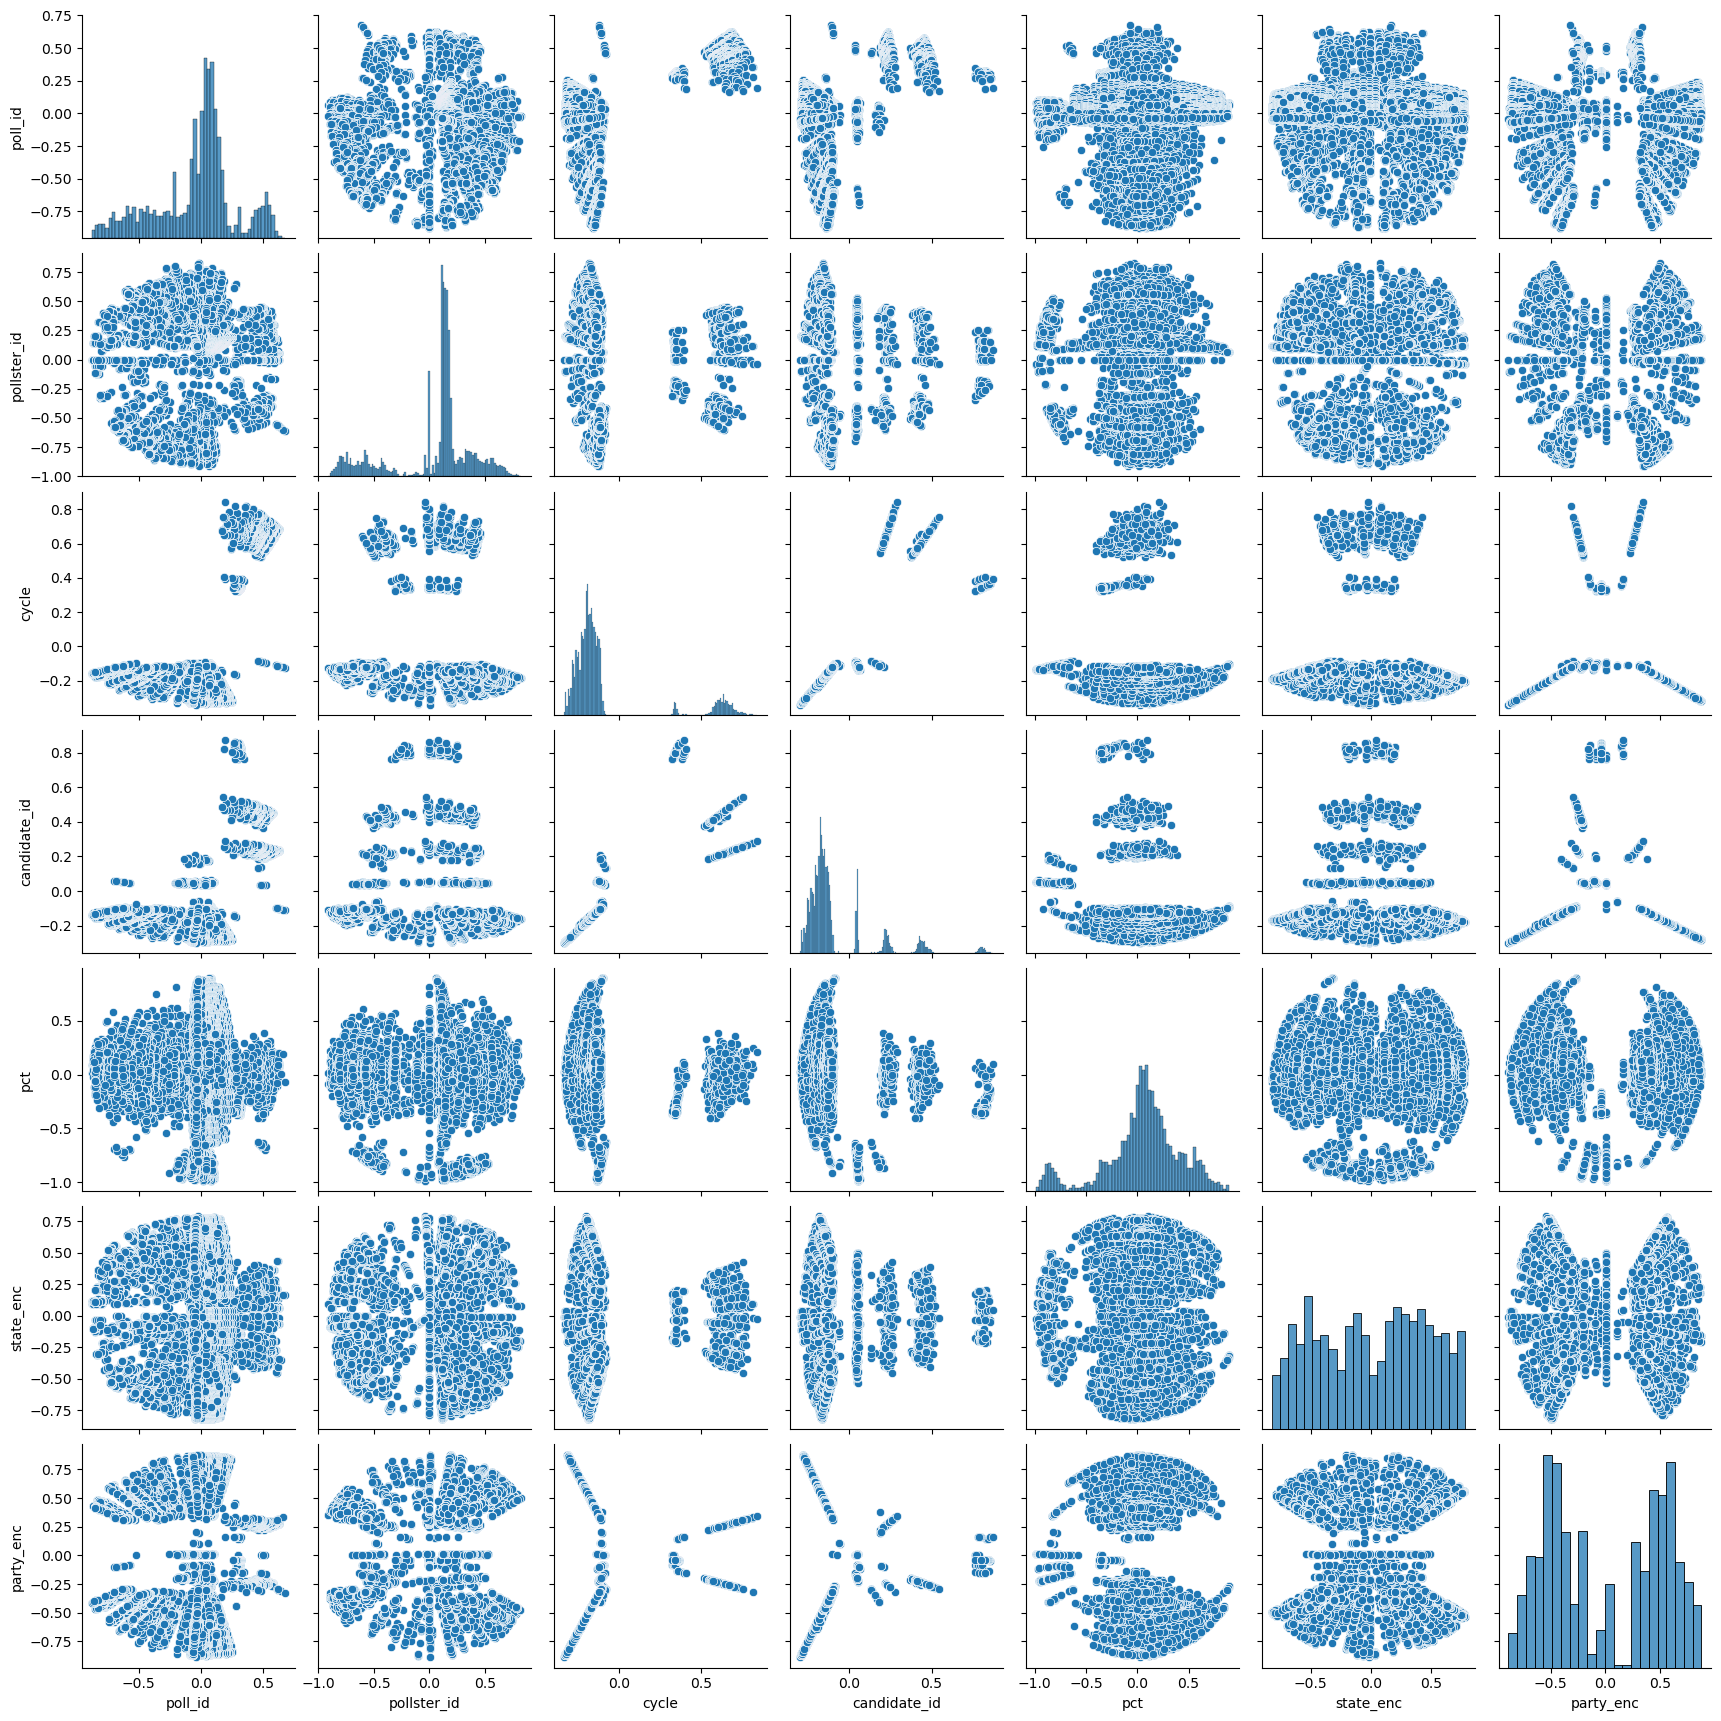

In [19]:
sns.pairplot(normalized_df)

- As expected, we can see that pct is the only meaningful distribution that we have
- But we do not want to use the data as is, so let us pivot the data based on the states and explore how the distribution looks in comparison to the plain dataset

### Improvising with the baseline

In [20]:
# Pivoting the data to find the average voting percentage for all possible parties in each state
df_party = df_merged.pivot_table(index = ['state'], columns = 'party', values = 'pct').round(2)
df_party

party          CON    DEM   GRE    IND   LIB  OTH  PSL    REP  SWP
state                                                             
Alabama        NaN  38.83  1.00    NaN  5.73  NaN  NaN  58.04  NaN
Alaska         NaN  43.17   NaN  17.00  8.00  NaN  NaN  51.60  NaN
Arizona        0.0  46.27  0.59   7.23  2.19  NaN  NaN  45.13  NaN
Arkansas       NaN  38.60  1.00    NaN  2.00  NaN  NaN  58.44  NaN
California     NaN  57.56  1.38   4.78  1.62  NaN  NaN  32.88  NaN
...            ...    ...   ...    ...   ...  ...  ...    ...  ...
Virginia       NaN  50.53  0.00   8.25  2.17  NaN  NaN  41.99  NaN
Washington     NaN  58.44  0.50   6.00  2.00  NaN  NaN  35.96  NaN
West Virginia  NaN  32.76  1.00    NaN  4.00  NaN  NaN  65.02  NaN
Wisconsin      0.7  48.43  1.09   6.11  2.46  NaN  NaN  43.95  NaN
Wyoming        NaN  31.35   NaN    NaN  5.00  NaN  NaN  66.55  NaN

[55 rows x 9 columns]

In [21]:
# Since we only want significant parties, we clean up the data by removing those parties that have not been polled in at least 30 states
df_party.dropna(thresh = 30, inplace=True, axis=1)
df_party.fillna(0, inplace=True)
df_party

party            DEM   GRE   LIB    REP
state                                  
Alabama        38.83  1.00  5.73  58.04
Alaska         43.17  0.00  8.00  51.60
Arizona        46.27  0.59  2.19  45.13
Arkansas       38.60  1.00  2.00  58.44
California     57.56  1.38  1.62  32.88
...              ...   ...   ...    ...
Virginia       50.53  0.00  2.17  41.99
Washington     58.44  0.50  2.00  35.96
West Virginia  32.76  1.00  4.00  65.02
Wisconsin      48.43  1.09  2.46  43.95
Wyoming        31.35  0.00  5.00  66.55

[55 rows x 4 columns]

We shall use K-means as a baseline algorithm, as it is the most widely used clustering algorithm

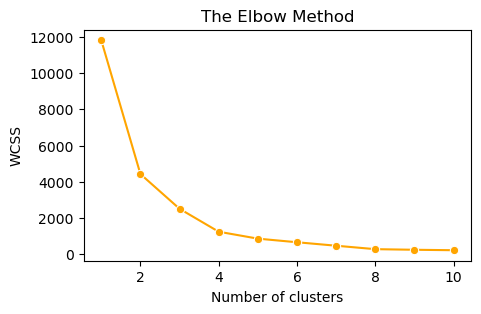

In [22]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_party)
    # inertia method returns wcss for that model
    wcss.append([i,kmeans.inertia_])

    
wcss_x = [i[0] for i in wcss]
wcss_y = [i[1] for i in wcss]

plt.figure(figsize=(5,3))
sns.lineplot(x=wcss_x, y=wcss_y, marker='o',color='orange')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

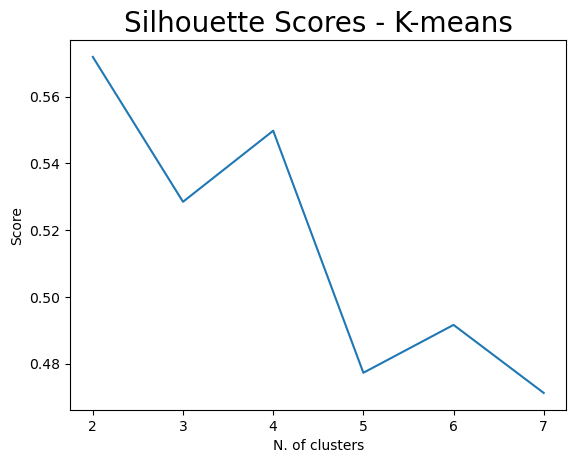

In [23]:
n_clusters=np.arange(2, 8)
sils=[]
sils_err=[]
iterations=5
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,n_clusters=n, n_init=10,random_state=60, tol=0.0001, verbose=0).fit(df_party)
        labels=kmeans.predict(df_party)
        sil=metrics.silhouette_score(df_party, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean((np.array(tmp_sil)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

# Plotting the results
plt.plot(n_clusters, sils)
plt.title("Silhouette Scores - K-means", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.savefig('KmeansSilScore')

In [24]:
kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
 n_clusters=4, n_init=10,
 random_state=60, tol=0.0001, verbose=0)
labels = kmeans.fit_predict(df_party)
df_party['Labels']=labels
print("4 clusters")
print(df_party.groupby(by = 'Labels').mean().round(2))

4 clusters
party     DEM   GRE   LIB    REP
Labels                          
0       39.87  0.42  2.66  56.14
1       48.46  0.67  2.07  44.73
2       60.89  0.62  1.08  34.22
3       88.17  0.00  0.00   9.52


In [25]:
kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
 n_clusters=3, n_init=10,
 random_state=60, tol=0.0001, verbose=0)
df_party.drop('Labels', axis=1, inplace=True)
labels = kmeans.fit_predict(df_party)
df_party['Labels']=labels
print("3 clusters")
print(df_party.groupby(by = 'Labels').mean().round(2))

3 clusters
party     DEM   GRE   LIB    REP
Labels                          
0       39.87  0.42  2.66  56.14
1       48.46  0.67  2.07  44.73
2       62.71  0.58  1.01  32.57


In [26]:
df_kmeans_rep = df_party[df_party['Labels']==0]
df_kmeans_rep

party             DEM   GRE   LIB    REP  Labels
state                                           
Alabama         38.83  1.00  5.73  58.04       0
Alaska          43.17  0.00  8.00  51.60       0
Arkansas        38.60  1.00  2.00  58.44       0
Idaho           38.91  0.00  0.00  58.50       0
Indiana         43.17  0.00  4.10  53.42       0
Kansas          44.17  1.00  3.00  51.82       0
Kentucky        39.16  1.00  2.25  57.15       0
Louisiana       39.89  0.00  2.85  56.38       0
Mississippi     40.53  1.00  2.00  56.69       0
Missouri        42.72  0.73  1.80  52.05       0
Montana         42.72  0.50  2.29  52.31       0
Nebraska        44.52  0.00  0.00  52.84       0
North Dakota    37.19  0.00  0.00  59.25       0
Oklahoma        37.60  0.00  1.15  59.12       0
South Carolina  43.34  0.57  1.33  51.58       0
South Dakota    40.49  0.00  3.00  56.38       0
Tennessee       37.98  0.30  1.10  54.53       0
Utah            40.28  0.33  3.67  51.08       0
West Virginia   32.76  1.00  4.00  65.02       0
Wyoming         31.35  0.00  5.00  66.55       0

In [27]:
df_kmeans_dem = df_party[df_party['Labels'] == 2]
df_kmeans_dem

party                   DEM   GRE   LIB    REP  Labels
state                                                 
California            57.56  1.38  1.62  32.88       2
Connecticut           58.71  0.50  1.70  35.19       2
Delaware              61.75  1.00  2.00  35.86       2
District of Columbia  88.17  0.00  0.00   9.52       2
Hawaii                63.98  0.00  0.00  33.08       2
Illinois              57.43  0.40  1.50  38.62       2
Maine CD-1            56.50  1.23  2.42  34.79       2
Maryland              63.90  1.20  1.75  31.72       2
Massachusetts         66.74  0.00  0.00  28.94       2
New Jersey            57.75  0.30  0.50  36.10       2
New York              59.29  1.00  0.40  33.50       2
Oregon                59.36  1.20  1.20  38.39       2
Rhode Island          64.18  0.00  0.00  33.49       2
Vermont               66.93  0.00  0.00  30.52       2
Washington            58.44  0.50  2.00  35.96       2

In [28]:
df_kmeans_swing = df_party[df_party['Labels']==1]
df_kmeans_swing

party             DEM   GRE   LIB    REP  Labels
state                                           
Arizona         46.27  0.59  2.19  45.13       1
Colorado        53.94  1.46  3.10  40.56       1
Florida         47.41  0.61  1.35  46.51       1
Georgia         45.79  0.68  2.11  46.35       1
Iowa            45.76  0.50  2.17  48.70       1
Maine           54.05  1.05  2.29  41.69       1
Maine CD-2      45.75  0.84  1.94  45.71       1
Michigan        47.93  0.66  2.05  43.08       1
Minnesota       52.47  0.63  2.37  42.16       1
Nebraska CD-1   46.00  0.00  0.00  48.00       1
Nebraska CD-2   50.73  0.00  3.80  44.01       1
Nevada          46.69  0.82  2.60  45.61       1
New Hampshire   50.39  1.35  1.47  42.65       1
New Mexico      52.90  0.00  2.00  44.07       1
North Carolina  46.91  0.64  1.74  45.80       1
Ohio            45.40  0.88  1.94  47.68       1
Pennsylvania    48.07  0.75  1.90  44.42       1
Texas           43.72  0.94  1.78  46.59       1
Virginia        50.53  0.00  2.17  41.99       1
Wisconsin       48.43  1.09  2.46  43.95       1

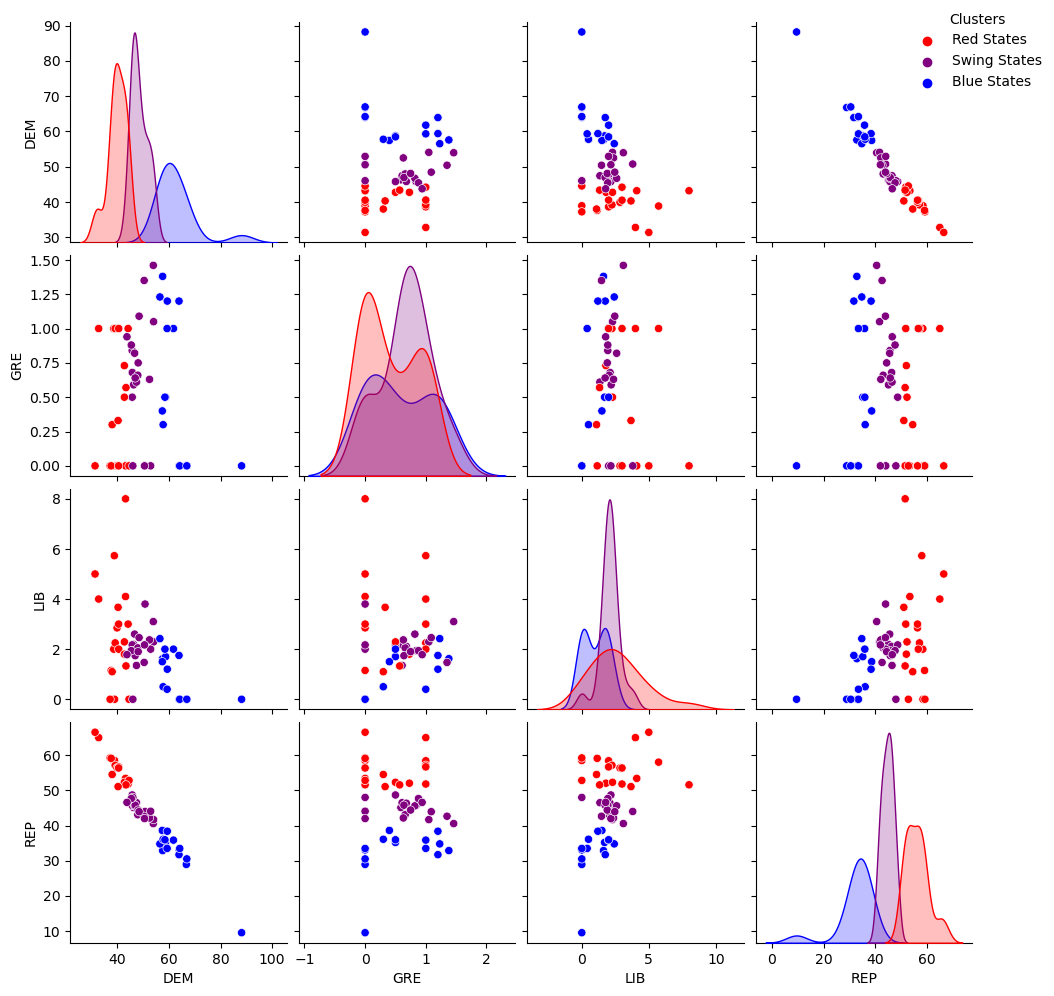

In [29]:
cluster_color_kmeans = {0: 'red', 1:'purple', 2: 'blue'}
pplot = sns.pairplot(df_party, hue='Labels', palette=cluster_color_kmeans)

pplot._legend.set_title('Clusters')

new_labels = ['Red States', 'Swing States', 'Blue States']
for t, l in zip(pplot._legend.texts, new_labels):
    t.set_text(l)
sns.move_legend(pplot, 'upper right')
plt.show(pplot)

In [30]:
((df_kmeans_dem['DEM'] - df_kmeans_dem['REP']).abs()).mean().round(2)

30.14

In [31]:
((df_kmeans_rep['DEM'] - df_kmeans_rep['REP']).abs()).mean().round(2)

16.27

In [32]:
((df_kmeans_swing['DEM'] - df_kmeans_swing['REP']).abs()).mean().round(2)

4.79

In [33]:
df_kmeans = df_party.reset_index()

In [34]:
cluster_colors = {
    0: 'red',
    1: 'purple',
    2: 'blue',
}
df_kmeans['color'] = df_kmeans['Labels'].map(cluster_colors)
df_kmeans

party          state    DEM   GRE   LIB    REP  Labels   color
0            Alabama  38.83  1.00  5.73  58.04       0     red
1             Alaska  43.17  0.00  8.00  51.60       0     red
2            Arizona  46.27  0.59  2.19  45.13       1  purple
3           Arkansas  38.60  1.00  2.00  58.44       0     red
4         California  57.56  1.38  1.62  32.88       2    blue
..               ...    ...   ...   ...    ...     ...     ...
50          Virginia  50.53  0.00  2.17  41.99       1  purple
51        Washington  58.44  0.50  2.00  35.96       2    blue
52     West Virginia  32.76  1.00  4.00  65.02       0     red
53         Wisconsin  48.43  1.09  2.46  43.95       1  purple
54           Wyoming  31.35  0.00  5.00  66.55       0     red

[55 rows x 7 columns]

In [35]:
color_code = {key: val for key, val in zip(df_kmeans['state'], df_kmeans['color'])}
color_code

{'Alabama': 'red',
 'Alaska': 'red',
 'Arizona': 'purple',
 'Arkansas': 'red',
 'California': 'blue',
 'Colorado': 'purple',
 'Connecticut': 'blue',
 'Delaware': 'blue',
 'District of Columbia': 'blue',
 'Florida': 'purple',
 'Georgia': 'purple',
 'Hawaii': 'blue',
 'Idaho': 'red',
 'Illinois': 'blue',
 'Indiana': 'red',
 'Iowa': 'purple',
 'Kansas': 'red',
 'Kentucky': 'red',
 'Louisiana': 'red',
 'Maine': 'purple',
 'Maine CD-1': 'blue',
 'Maine CD-2': 'purple',
 'Maryland': 'blue',
 'Massachusetts': 'blue',
 'Michigan': 'purple',
 'Minnesota': 'purple',
 'Mississippi': 'red',
 'Missouri': 'red',
 'Montana': 'red',
 'Nebraska': 'red',
 'Nebraska CD-1': 'purple',
 'Nebraska CD-2': 'purple',
 'Nevada': 'purple',
 'New Hampshire': 'purple',
 'New Jersey': 'blue',
 'New Mexico': 'purple',
 'New York': 'blue',
 'North Carolina': 'purple',
 'North Dakota': 'red',
 'Ohio': 'purple',
 'Oklahoma': 'red',
 'Oregon': 'blue',
 'Pennsylvania': 'purple',
 'Rhode Island': 'blue',
 'South Carolina':

In [36]:
import requests

geo_json_data = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
).json()

In [41]:
# Create a map centered at the mean of all state coordinates
m_kmeans = folium.Map(location=[39.8283, -98.5795], zoom_start=4)


tooltip = folium.GeoJsonTooltip(
    fields=["name"],
    aliases=["State: "],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)


folium.GeoJson(
    geo_json_data,
    style_function=lambda x: {
        'fillColor': color_code.get(x['properties']['name']) ,
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.5,
    },
    tooltip=tooltip
).add_to(m_kmeans)
m_kmeans.save('KMeans US Cluster Map.html')
m_kmeans

# Exploring other algorithms
- While Kmeans is the most standard algorithm to use, let us leverage other algorithms that may be a better fit for the nature of the data that we have

### Agglomerative Clustering

In [42]:
df_party.drop('Labels', axis=1, inplace=True)

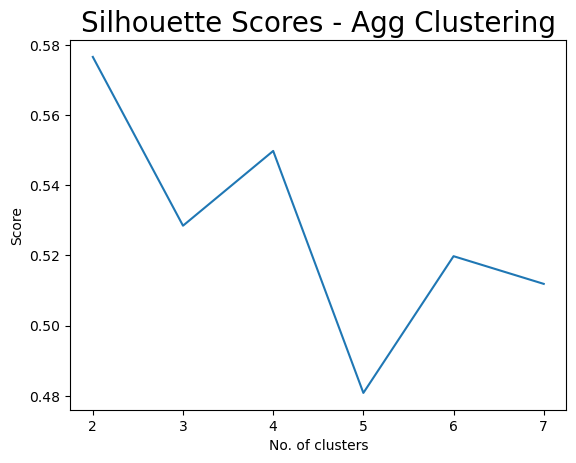

In [43]:
n_clusters=np.arange(2, 8)
sils=[]
iterations=5
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        agg=AgglomerativeClustering(n).fit(df_party) 
        labels=agg.fit_predict(df_party)
        sil=metrics.silhouette_score(df_party, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean((np.array(tmp_sil)))
    sils.append(val)

# Plotting the results
plt.plot(n_clusters, sils)
plt.title("Silhouette Scores - Agg Clustering", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("No. of clusters")
plt.ylabel("Score")
plt.savefig('AggClustSilScore')

In [44]:
clustering = AgglomerativeClustering(n_clusters=4)
cluster_labels = clustering.fit_predict(df_party)
df_party['Labels'] = cluster_labels
print("No. of clusters: ", 4)
print(df_party.groupby(by = 'Labels').mean().round(2))

No. of clusters:  4
party     DEM   GRE   LIB    REP
Labels                          
0       39.87  0.42  2.66  56.14
1       60.89  0.62  1.08  34.22
2       48.46  0.67  2.07  44.73
3       88.17  0.00  0.00   9.52


In [45]:
clustering = AgglomerativeClustering(n_clusters=3)
df_party.drop('Labels', axis=1, inplace=True)
cluster_labels = clustering.fit_predict(df_party)
df_party['Labels'] = cluster_labels
print("No. of clusters: ", 3)
print(df_party.groupby(by = 'Labels').mean().round(2))

No. of clusters:  3
party     DEM   GRE   LIB    REP
Labels                          
0       62.71  0.58  1.01  32.57
1       39.87  0.42  2.66  56.14
2       48.46  0.67  2.07  44.73


**Notes**
<br>
Similar to the Kmeans, we can see that while n = 4 has the best silhouette score, it is because the 4th cluster is a solitary data point (District of Columbia). The next best is n = 3, which is ideal as we want to split our data into 3 clusters.

In [46]:
df_party

party            DEM   GRE   LIB    REP  Labels
state                                          
Alabama        38.83  1.00  5.73  58.04       1
Alaska         43.17  0.00  8.00  51.60       1
Arizona        46.27  0.59  2.19  45.13       2
Arkansas       38.60  1.00  2.00  58.44       1
California     57.56  1.38  1.62  32.88       0
...              ...   ...   ...    ...     ...
Virginia       50.53  0.00  2.17  41.99       2
Washington     58.44  0.50  2.00  35.96       0
West Virginia  32.76  1.00  4.00  65.02       1
Wisconsin      48.43  1.09  2.46  43.95       2
Wyoming        31.35  0.00  5.00  66.55       1

[55 rows x 5 columns]

In [47]:
df_agg = df_party.groupby(by = 'Labels').mean().round(2)
df_agg

party     DEM   GRE   LIB    REP
Labels                          
0       62.71  0.58  1.01  32.57
1       39.87  0.42  2.66  56.14
2       48.46  0.67  2.07  44.73

In [48]:
df_agg_dem = df_party[df_party.Labels == 0]
df_agg_dem

party                   DEM   GRE   LIB    REP  Labels
state                                                 
California            57.56  1.38  1.62  32.88       0
Connecticut           58.71  0.50  1.70  35.19       0
Delaware              61.75  1.00  2.00  35.86       0
District of Columbia  88.17  0.00  0.00   9.52       0
Hawaii                63.98  0.00  0.00  33.08       0
Illinois              57.43  0.40  1.50  38.62       0
Maine CD-1            56.50  1.23  2.42  34.79       0
Maryland              63.90  1.20  1.75  31.72       0
Massachusetts         66.74  0.00  0.00  28.94       0
New Jersey            57.75  0.30  0.50  36.10       0
New York              59.29  1.00  0.40  33.50       0
Oregon                59.36  1.20  1.20  38.39       0
Rhode Island          64.18  0.00  0.00  33.49       0
Vermont               66.93  0.00  0.00  30.52       0
Washington            58.44  0.50  2.00  35.96       0

In [49]:
df_agg_rep = df_party[df_party.Labels == 1]
df_agg_rep

party             DEM   GRE   LIB    REP  Labels
state                                           
Alabama         38.83  1.00  5.73  58.04       1
Alaska          43.17  0.00  8.00  51.60       1
Arkansas        38.60  1.00  2.00  58.44       1
Idaho           38.91  0.00  0.00  58.50       1
Indiana         43.17  0.00  4.10  53.42       1
Kansas          44.17  1.00  3.00  51.82       1
Kentucky        39.16  1.00  2.25  57.15       1
Louisiana       39.89  0.00  2.85  56.38       1
Mississippi     40.53  1.00  2.00  56.69       1
Missouri        42.72  0.73  1.80  52.05       1
Montana         42.72  0.50  2.29  52.31       1
Nebraska        44.52  0.00  0.00  52.84       1
North Dakota    37.19  0.00  0.00  59.25       1
Oklahoma        37.60  0.00  1.15  59.12       1
South Carolina  43.34  0.57  1.33  51.58       1
South Dakota    40.49  0.00  3.00  56.38       1
Tennessee       37.98  0.30  1.10  54.53       1
Utah            40.28  0.33  3.67  51.08       1
West Virginia   32.76  1.00  4.00  65.02       1
Wyoming         31.35  0.00  5.00  66.55       1

In [50]:
df_agg_swing = df_party[df_party.Labels == 2]
df_agg_swing

party             DEM   GRE   LIB    REP  Labels
state                                           
Arizona         46.27  0.59  2.19  45.13       2
Colorado        53.94  1.46  3.10  40.56       2
Florida         47.41  0.61  1.35  46.51       2
Georgia         45.79  0.68  2.11  46.35       2
Iowa            45.76  0.50  2.17  48.70       2
Maine           54.05  1.05  2.29  41.69       2
Maine CD-2      45.75  0.84  1.94  45.71       2
Michigan        47.93  0.66  2.05  43.08       2
Minnesota       52.47  0.63  2.37  42.16       2
Nebraska CD-1   46.00  0.00  0.00  48.00       2
Nebraska CD-2   50.73  0.00  3.80  44.01       2
Nevada          46.69  0.82  2.60  45.61       2
New Hampshire   50.39  1.35  1.47  42.65       2
New Mexico      52.90  0.00  2.00  44.07       2
North Carolina  46.91  0.64  1.74  45.80       2
Ohio            45.40  0.88  1.94  47.68       2
Pennsylvania    48.07  0.75  1.90  44.42       2
Texas           43.72  0.94  1.78  46.59       2
Virginia        50.53  0.00  2.17  41.99       2
Wisconsin       48.43  1.09  2.46  43.95       2

In [51]:
((df_agg_dem['DEM'] - df_agg_dem['REP']).abs()).mean().round(2)

30.14

In [52]:
((df_agg_rep['DEM'] - df_agg_rep['REP']).abs()).mean().round(2)

16.27

In [53]:
(df_agg_swing['DEM'] - df_agg_swing['REP']).abs().mean().round(2)

4.79

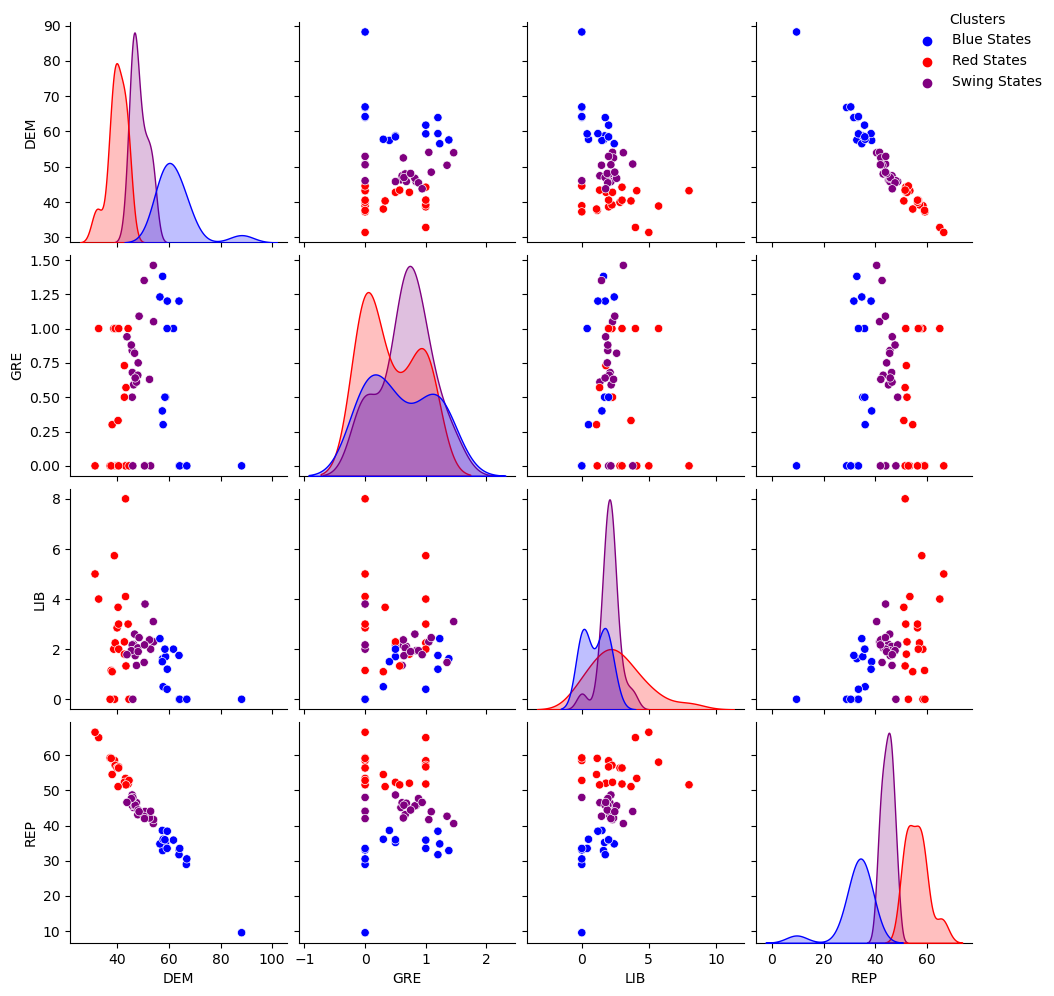

In [54]:
cluster_color_agg = {0: 'blue', 1:'red', 2: 'purple'}
pplot = sns.pairplot(df_party, hue='Labels', palette=cluster_color_agg)

pplot._legend.set_title('Clusters')

new_labels = ['Blue States', 'Red States', 'Swing States']
for t, l in zip(pplot._legend.texts, new_labels):
    t.set_text(l)
sns.move_legend(pplot, 'upper right')
plt.show(pplot)

In [55]:
df_agg = df_party.reset_index()

cluster_colors_agg = {
    0: 'blue',
    1: 'red',
    2: 'purple',
}
df_agg['color'] = df_agg['Labels'].map(cluster_colors_agg)
color_code_agg = {key: val for key, val in zip(df_agg['state'], df_agg['color'])}

geo_json_data = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
).json()

# Create a map centered at the mean of all state coordinates
m_agg = folium.Map(location=[39.8283, -98.5795], zoom_start=4)


tooltip = folium.GeoJsonTooltip(
    fields=["name"],
    aliases=["State: "],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)


folium.GeoJson(
    geo_json_data,
    style_function=lambda x: {
        'fillColor': color_code_agg.get(x['properties']['name']) ,
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.5,
    },
    tooltip=tooltip
).add_to(m_agg)
m_agg.save('Agg US Cluster Map.html')
m_agg

In [56]:
m_kmeans

**Notes**
- Looking at the average absolute difference b/w the pct of DEM and REP votes for each cluster and the folium map, we can see that the agglomerative clustering algorithm has clustered the states in the same manner as our baseline K-means.
- Let us explore GMM clustering, which may provide a slightly different perspective since it is capable of soft clustering and may have the nuance required to deal with this business case.

In [57]:
df_party.drop('Labels', axis=1,inplace=True)

### Gaussian Mixture Model (GMM)

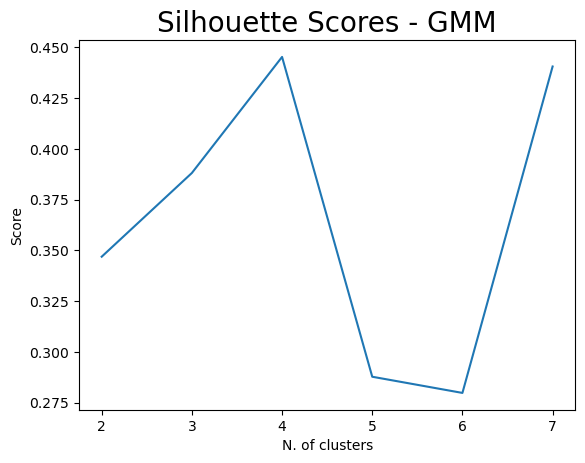

In [58]:
n_clusters=np.arange(2, 8)
sils=[]
sils_err=[]
iterations=5
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2, random_state = 0).fit(df_party) 
        labels=gmm.predict(df_party)
        sil=metrics.silhouette_score(df_party, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean((np.array(tmp_sil)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

# Plotting the results
plt.plot(n_clusters, sils)
plt.title("Silhouette Scores - GMM", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.savefig('GMMSilScore')

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_components': [3,4],  # Try different numbers of components
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],  # Try different covariance types
    'init_params': ['kmeans', 'random', 'kmeans++'],  # Try different initialization methods
}

# Initialize GMM model
gmm = GaussianMixture(random_state=0)

# Perform grid search
grid_search = GridSearchCV(gmm, param_grid, cv=5)  # Use cross-validation
grid_search.fit(df_party)  

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'covariance_type': 'tied', 'init_params': 'random', 'n_components': 4}


In [60]:
clustering = GaussianMixture(n_components=4, covariance_type = 'full', init_params = 'kmeans', random_state = 0, max_iter = 200)
cluster_labels = clustering.fit_predict(df_party)

df_party['Labels'] = cluster_labels
print("No. of clusters: ", 4)
print(df_party.groupby(by = 'Labels').mean().round(2))

No. of clusters:  4
party     DEM   GRE   LIB    REP
Labels                          
0       47.91  0.70  2.00  44.78
1       60.03  0.70  1.28  35.08
2       40.86  0.39  2.58  54.93
3       88.17  0.00  0.00   9.52


In [61]:
clustering = GaussianMixture(n_components=3, covariance_type = 'full', init_params = 'kmeans', random_state = 0, max_iter = 200)
df_party.drop(columns='Labels', inplace=True)
cluster_labels = clustering.fit_predict(df_party)
df_party['Labels'] = cluster_labels
print("No. of clusters: ", 3)
print(df_party.groupby(by = 'Labels').mean().round(2))

No. of clusters:  3
party     DEM   GRE   LIB    REP
Labels                          
0       47.73  0.65  2.04  44.93
1       61.06  0.70  1.22  34.08
2       40.86  0.39  2.58  54.93


In [62]:
df_party

party            DEM   GRE   LIB    REP  Labels
state                                          
Alabama        38.83  1.00  5.73  58.04       2
Alaska         43.17  0.00  8.00  51.60       2
Arizona        46.27  0.59  2.19  45.13       0
Arkansas       38.60  1.00  2.00  58.44       2
California     57.56  1.38  1.62  32.88       1
...              ...   ...   ...    ...     ...
Virginia       50.53  0.00  2.17  41.99       0
Washington     58.44  0.50  2.00  35.96       1
West Virginia  32.76  1.00  4.00  65.02       2
Wisconsin      48.43  1.09  2.46  43.95       0
Wyoming        31.35  0.00  5.00  66.55       2

[55 rows x 5 columns]

In [63]:
df_dem = df_party[df_party.Labels == 1]
df_dem

party                   DEM   GRE   LIB    REP  Labels
state                                                 
California            57.56  1.38  1.62  32.88       1
Colorado              53.94  1.46  3.10  40.56       1
Connecticut           58.71  0.50  1.70  35.19       1
Delaware              61.75  1.00  2.00  35.86       1
District of Columbia  88.17  0.00  0.00   9.52       1
Hawaii                63.98  0.00  0.00  33.08       1
Illinois              57.43  0.40  1.50  38.62       1
Maine                 54.05  1.05  2.29  41.69       1
Maine CD-1            56.50  1.23  2.42  34.79       1
Maryland              63.90  1.20  1.75  31.72       1
Massachusetts         66.74  0.00  0.00  28.94       1
New Hampshire         50.39  1.35  1.47  42.65       1
New Jersey            57.75  0.30  0.50  36.10       1
New York              59.29  1.00  0.40  33.50       1
Oregon                59.36  1.20  1.20  38.39       1
Rhode Island          64.18  0.00  0.00  33.49       1
Vermont               66.93  0.00  0.00  30.52       1
Washington            58.44  0.50  2.00  35.96       1

In [64]:
df_rep = df_party[df_party.Labels == 2]
df_rep

party            DEM   GRE   LIB    REP  Labels
state                                          
Alabama        38.83  1.00  5.73  58.04       2
Alaska         43.17  0.00  8.00  51.60       2
Arkansas       38.60  1.00  2.00  58.44       2
Idaho          38.91  0.00  0.00  58.50       2
Indiana        43.17  0.00  4.10  53.42       2
...              ...   ...   ...    ...     ...
South Dakota   40.49  0.00  3.00  56.38       2
Tennessee      37.98  0.30  1.10  54.53       2
Utah           40.28  0.33  3.67  51.08       2
West Virginia  32.76  1.00  4.00  65.02       2
Wyoming        31.35  0.00  5.00  66.55       2

[23 rows x 5 columns]

In [65]:
df_swing = df_party[df_party.Labels == 0]
df_swing

party             DEM   GRE   LIB    REP  Labels
state                                           
Arizona         46.27  0.59  2.19  45.13       0
Florida         47.41  0.61  1.35  46.51       0
Georgia         45.79  0.68  2.11  46.35       0
Maine CD-2      45.75  0.84  1.94  45.71       0
Michigan        47.93  0.66  2.05  43.08       0
Minnesota       52.47  0.63  2.37  42.16       0
Nevada          46.69  0.82  2.60  45.61       0
New Mexico      52.90  0.00  2.00  44.07       0
North Carolina  46.91  0.64  1.74  45.80       0
Ohio            45.40  0.88  1.94  47.68       0
Pennsylvania    48.07  0.75  1.90  44.42       0
Texas           43.72  0.94  1.78  46.59       0
Virginia        50.53  0.00  2.17  41.99       0
Wisconsin       48.43  1.09  2.46  43.95       0

In [66]:
((df_dem['DEM'] - df_dem['REP']).abs()).mean().round(2)

26.98

In [67]:
((df_rep['DEM'] - df_rep['REP']).abs()).mean().round(2)

14.65

In [68]:
(df_swing['DEM'] - df_swing['REP']).abs().mean().round(2)

3.62

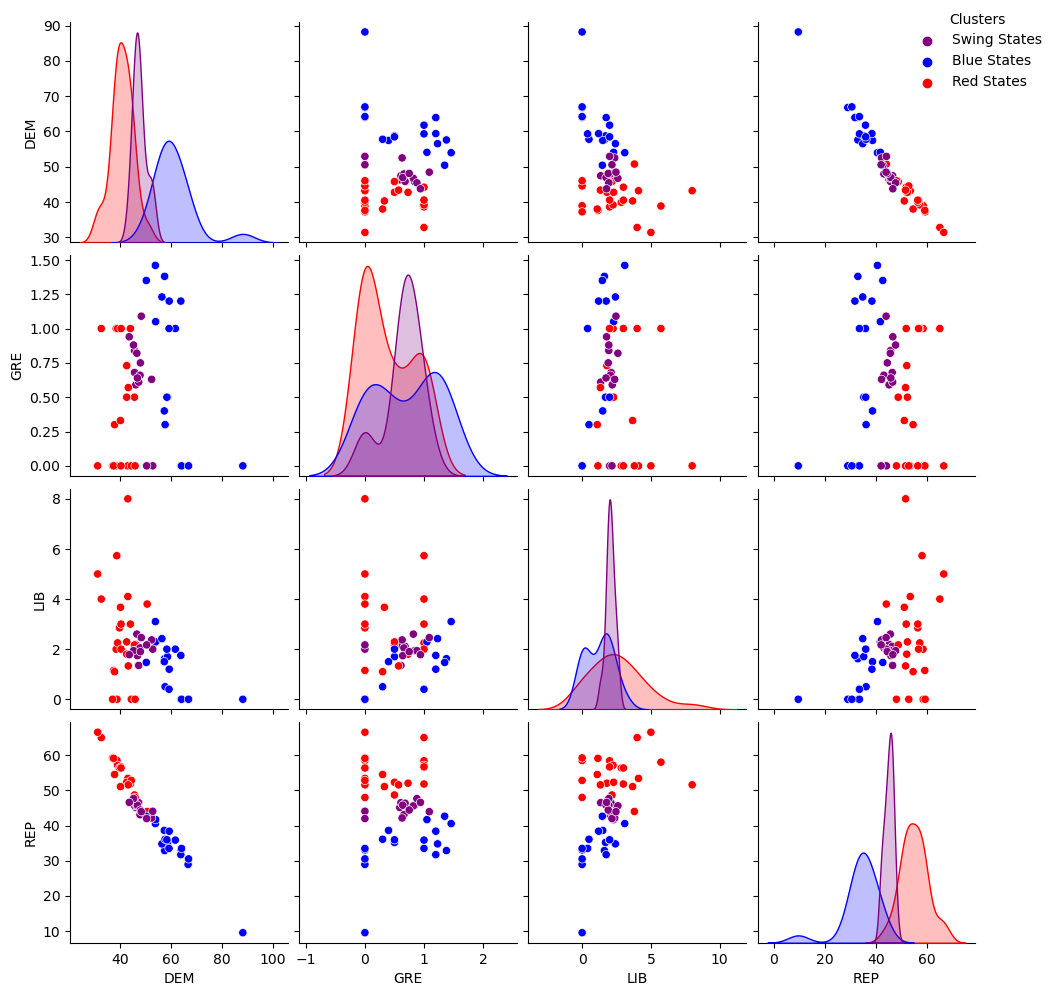

In [69]:
cluster_color_gmm = {0: 'purple', 1:'blue', 2: 'red'}
pplot = sns.pairplot(df_party, hue='Labels', palette=cluster_color_gmm)

pplot._legend.set_title('Clusters')

new_labels = ['Swing States', 'Blue States', 'Red States']
for t, l in zip(pplot._legend.texts, new_labels):
    t.set_text(l)
sns.move_legend(pplot, 'upper right')
plt.show(pplot)

In [70]:
# import plotly.graph_objects as go

# cluster_names = ['Swing States', 'Blue States', 'Red States']
# cluster_colors = ['purple', 'blue', 'red']

# for i in range(3):
#     for j in range(i+1, 4):
#         fig = go.Figure()
#         for cluster_label, cluster_name, cluster_color in zip(range(3), cluster_names, cluster_colors):
#             # Filter data points belonging to the current cluster
#             df_temp = df_party[df_party['Labels'] == cluster_label]
#             fig.add_trace(go.Scatter(
#                 x=df_temp[df_party_headers[i]],
#                 y=df_temp[df_party_headers[j]],
#                 mode='markers',
#                 marker=dict(color=cluster_color),
#                 name=cluster_name,
#                 opacity=0.5,
#                 hovertext=df_temp.index
#             ))

#         fig.update_layout(
#             xaxis_title=df_party_headers[i],
#             yaxis_title=df_party_headers[j],
#             legend_title="Clusters"
#         )
#         fig.show()


In [71]:
df_gmm = df_party.reset_index()

df_gmm['color'] = df_gmm['Labels'].map(cluster_color_gmm)
color_code_gmm = {key: val for key, val in zip(df_gmm['state'], df_gmm['color'])}

geo_json_data = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
).json()

# Create a map centered at the mean of all state coordinates
m_gmm = folium.Map(location=[39.8283, -98.5795], zoom_start=4)


tooltip = folium.GeoJsonTooltip(
    fields=["name"],
    aliases=["State: "],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)


folium.GeoJson(
    geo_json_data,
    style_function=lambda x: {
        'fillColor': color_code_gmm.get(x['properties']['name']) ,
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.5,
    },
    tooltip=tooltip
).add_to(m_gmm)
m_gmm.save('GMM US Cluster Map.html')
m_gmm

In [72]:
m_kmeans

In [73]:
m_agg

**Notes**
- The GMM clustering shows some huge differences compared to KMeans and Agglomerative clustering.
- One of the biggest noticeable differences is that both KMeans and Agglomerative split the states (and 4 congressional districts) into clusters of 20-20-15, while GMM was less patterned and had clusters of 23-18-14.
- GMM clustered the 2 Congressional districts of Nebraska and Iowa as Red states, thus improving on the baseline algorithm and agglomerative clustering.
- It also reduced the swing state clusters and added Colorado, Maine and New Hampshire to the Blue States

In [74]:
df_merged[df_merged['state']=='Maine'].pivot_table(index = ['state'], columns = 'party', values = 'pct')

party        DEM   GRE       LIB       OTH        REP
state                                                
Maine  54.052472  1.05  2.285714  0.466667  41.687416

In [75]:
df_merged[df_merged['state']=='New Hampshire'].pivot_table(index = ['state'], columns = 'party', values = 'pct')

party               DEM   GRE   IND       LIB        REP
state                                                   
New Hampshire  50.38525  1.35  6.52  1.472727  42.651812

In [76]:
df_merged[df_merged['state']=='Colorado'].pivot_table(index = ['state'], columns = 'party', values = 'pct')

party     CON     DEM   GRE  IND  LIB     REP
state                                        
Colorado  0.0  53.942  1.46  1.0  3.1  40.558

In [77]:
df_merged[df_merged['state']=='Iowa'].pivot_table(index = ['poll_id'], columns = 'party', values = 'pct')

party          DEM  GRE    IND  LIB        REP
poll_id                                       
57445    46.533333  NaN  11.40  NaN  52.200000
57742    48.200000  NaN   7.25  NaN  49.728571
58045    44.000000  NaN    NaN  NaN  49.000000
60106    49.666667  NaN    NaN  NaN  50.333333
62530    42.227500  NaN    NaN  NaN  45.887500
...            ...  ...    ...  ...        ...
84123    36.850000  NaN   4.70  NaN  48.750000
84321    36.200000  NaN    NaN  NaN  47.450000
84401    33.800000  NaN    NaN  NaN  43.500000
85456    39.600000  NaN    NaN  NaN  48.200000
85542    39.000000  NaN    NaN  NaN  51.000000

[87 rows x 5 columns]

In [78]:
df_iowa = df_merged[df_merged['state']=='Iowa'].pivot_table(index = ['poll_id'], columns = 'party', values = 'pct')
df_iowa

party          DEM  GRE    IND  LIB        REP
poll_id                                       
57445    46.533333  NaN  11.40  NaN  52.200000
57742    48.200000  NaN   7.25  NaN  49.728571
58045    44.000000  NaN    NaN  NaN  49.000000
60106    49.666667  NaN    NaN  NaN  50.333333
62530    42.227500  NaN    NaN  NaN  45.887500
...            ...  ...    ...  ...        ...
84123    36.850000  NaN   4.70  NaN  48.750000
84321    36.200000  NaN    NaN  NaN  47.450000
84401    33.800000  NaN    NaN  NaN  43.500000
85456    39.600000  NaN    NaN  NaN  48.200000
85542    39.000000  NaN    NaN  NaN  51.000000

[87 rows x 5 columns]

In [79]:
sum(df_iowa['DEM'] < df_iowa['REP'])

56

In [80]:
df_temp = df_party.reset_index()
df_iowa = df_temp[df_temp.state=='Iowa']
df_iowa = df_iowa.iloc[:,[1,2,3,4]]
df_iowa

party    DEM  GRE   LIB   REP
15     45.76  0.5  2.17  48.7

In [81]:
prob = clustering.predict_proba(df_iowa)
prob

array([[0.03221809, 0.05096364, 0.91681826]])

# SocioEconomic Data

## Population

In [82]:
df_pop = pd.read_excel("data/PopulationReport.xlsx")
header = df_pop.loc[2].to_list()
df_pop = df_pop[3:]
df_pop.columns = header
df_pop = df_pop.loc[:55]
df_pop = df_pop[df_pop.Name != 'United States']
df_pop = df_pop[df_pop.Name != 'Puerto Rico']
df_pop = df_pop.rename(columns={'Change 2020-22': 'Pop. Change 2020-22 Perc'})
df_pop['Pop. Change 2020-22 Perc'] *= 100
df_pop = df_pop.iloc[:,[0,3,4,5,6]]
df_pop

Name Pop. 2010 Pop. 2020 Pop. 2022 Pop. Change 2020-22 Perc
4         Alabama   4779736   5024356   5074296                 0.993958
5          Alaska    710231    733378    733583                 0.027953
6         Arizona   6392017   7151507   7359197                 2.904143
7        Arkansas   2915918   3011555   3045637                 1.131708
8      California  37253956  39538245  39029342                -1.287116
..            ...       ...       ...       ...                      ...
50       Virginia   8001024   8631384   8683619                 0.605175
51     Washington   6724540   7705247   7785786                 1.045249
52  West Virginia   1852994   1793755   1775156                -1.036875
53      Wisconsin   5686986   5893725   5892539                -0.020123
54        Wyoming    563626    576837    581381                 0.787744

[51 rows x 5 columns]

## Poverty

In [83]:
df_pov = pd.read_excel("data/PovertyReport.xlsx")
df_pov = df_pov[2:57]
df_pov.dropna(axis = 1, how ='all', inplace = True)

all_pov = df_pov.loc[4][1:4].to_list()
all_pov_head = ['Overall Poverty '+ head for head in all_pov]

youth_pov = df_pov.loc[4][4:].to_list()
youth_pov_head = ['Youth Poverty '+ head for head in all_pov]

pov_header = ['Name']
pov_header += all_pov_head
pov_header += youth_pov_head
df_pov = df_pov[3:]
df_pov.columns = pov_header
df_pov = df_pov[df_pov.Name != 'Puerto Rico']
df_pov = df_pov[df_pov.Name != 'National']
df_pov

Name Overall Poverty Percent Overall Poverty Lower Bound  \
5         Alabama                    16.3                        15.9   
6          Alaska                    10.8                        10.3   
7         Arizona                    12.9                        12.6   
8        Arkansas                      16                        15.6   
9      California                    12.3                        12.2   
..            ...                     ...                         ...   
52       Virginia                    10.3                        10.1   
53     Washington                     9.9                         9.7   
54  West Virginia                    16.8                        16.3   
55      Wisconsin                    10.8                        10.6   
56        Wyoming                    10.6                         9.9   

   Overall Poverty Upper Bound Youth Poverty Percent  \
5                         16.7                  22.7   
6                         11.3                  13.5   
7                         13.2                  17.8   
8                         16.4                  21.8   
9                         12.4                  15.8   
..                         ...                   ...   
52                        10.5                  13.3   
53                        10.1                    12   
54                        17.3                  21.4   
55                          11                  13.6   
56                        11.3                  12.1   

   Youth Poverty Lower Bound Youth Poverty Upper Bound  
5                       21.9                      23.5  
6                       12.7                      14.3  
7                       17.2                      18.4  
8                         21                      22.6  
9                       15.5                      16.1  
..                       ...                       ...  
52                      12.8                      13.8  
53                      11.4                      12.6  
54                      20.5                      22.3  
55                      13.1                      14.1  
56                      11.1                      13.1  

[51 rows x 7 columns]

## Un-employment

In [84]:
df_unemp = pd.read_excel("data/UnemploymentReport.xlsx")
df_unemp.drop(df_unemp.columns[[0,1]], axis = 1, inplace = True)

unemp_header = []
for x in df_unemp.loc[2].to_list(): 
    if isinstance(x, Number) == True:
        x = int(x)
        temp = 'Unemployment pct ' + str(x)
        unemp_header.append(temp)
    else:
        unemp_header.append(x)
df_unemp = df_unemp[3:54]
df_unemp.columns = unemp_header

df_unemp['Median Household Income (2021)'] = df_unemp['Median Household Income (2021)'].str.replace('$', '').str.replace(',', '')
# Convert the column to float
df_unemp['2014'] = pd.to_numeric(df_unemp['2014'], errors='coerce')
df_unemp['Median Household Income (2021)'] = pd.to_numeric(df_unemp['Median Household Income (2021)'], errors='coerce')
df_unemp.rename(columns = {'2014': 'Unemployment pct 2014', 'Median Household Income (2021)': 'Median Household Income 2021' }, inplace = True)
df_unemp

Name  Unemployment pct 2014  Unemployment pct 2015  \
3         Alabama                    6.7                    6.1   
4          Alaska                    6.7                    6.3   
5         Arizona                    6.8                    6.1   
6        Arkansas                    5.9                    5.0   
7      California                    7.6                    6.3   
..            ...                    ...                    ...   
49       Virginia                    5.1                    4.4   
50     Washington                    5.9                    5.4   
51  West Virginia                    6.5                    6.6   
52      Wisconsin                    5.3                    4.4   
53        Wyoming                    4.3                    4.2   

    Unemployment pct 2016  Unemployment pct 2017  Unemployment pct 2018  \
3                     5.9                    4.5                    3.9   
4                     6.6                    6.5                    6.0   
5                     5.5                    5.0                    4.8   
6                     4.0                    3.7                    3.7   
7                     5.5                    4.8                    4.2   
..                    ...                    ...                    ...   
49                    4.0                    3.7                    3.0   
50                    5.2                    4.6                    4.4   
51                    6.1                    5.2                    5.1   
52                    3.9                    3.3                    3.0   
53                    5.4                    4.3                    4.1   

    Unemployment pct 2019  Unemployment pct 2020  Unemployment pct 2021  \
3                     3.2                    6.4                    3.4   
4                     5.6                    8.3                    6.4   
5                     4.8                    7.8                    5.1   
6                     3.5                    6.2                    4.1   
7                     4.1                   10.1                    7.3   
..                    ...                    ...                    ...   
49                    2.8                    6.5                    3.9   
50                    4.2                    8.5                    5.2   
51                    5.0                    8.2                    5.1   
52                    3.2                    6.4                    3.8   
53                    3.7                    5.9                    4.6   

    Unemployment pct 2022  Median Household Income 2021  
3                     2.6                         53990  
4                     4.0                         78437  
5                     3.8                         68967  
6                     3.3                         52577  
7                     4.2                         84831  
..                    ...                           ...  
49                    2.9                         80926  
50                    4.2                         84155  
51                    3.9                         51122  
52                    2.9                         67150  
53                    3.6                         66508  

[51 rows x 11 columns]

## Education

In [85]:
df_edu = pd.read_excel("data/EducationReport.xlsx")
df_edu.dropna(thresh = 30, inplace=True, axis=1)
appends = ['Total', 'Urban', 'Rural']
headers = df_edu.loc[2, :].tolist()
counter = 0
column_headers = ['Name']
for x in headers[1:]:
    idx = counter//6
    if isinstance(x, Number) == True:
        x = int(x)
        temp = 'Edu pct '+ appends[idx] + '_' + str(x)
        column_headers.append(temp)
    else:
        column_headers.append('Edu pct '+ appends[idx]+ '_' +x)
    counter+=1
df_edu.columns = column_headers
df_edu = df_edu.loc[3:55, :]
df_edu.fillna(0, inplace=True)
df_edu.columns = df_edu.columns.str.replace('_', ' ')
df_edu = df_edu[df_edu.Name != 'Puerto Rico']
df_edu = df_edu[df_edu.Name != 'United States']
df_edu = df_edu.iloc[:,[0,5,6,11,12,17,18]]
df_edu[df_edu.select_dtypes(include=['number']).columns] *= 100
df_edu

Name  Edu pct Total 2008-2012  Edu pct Total 2017-2021  \
4         Alabama                22.264896                26.668938   
5          Alaska                27.476243                30.593829   
6         Arizona                26.629277                31.206465   
7        Arkansas                19.798349                24.304726   
8      California                30.453450                35.270416   
..            ...                      ...                      ...   
50       Virginia                34.678472                40.329597   
51     Washington                31.572242                37.282397   
52  West Virginia                17.907812                21.776192   
53      Wisconsin                26.398321                31.489528   
54        Wyoming                24.260838                28.522255   

    Edu pct Urban 2008-2012  Edu pct Urban 2017-2021  Edu pct Rural 2008-2012  \
4                 25.157749                29.820382                13.525811   
5                 29.759994                33.167720                22.904649   
6                 27.325217                31.922078                14.019828   
7                 23.873195                29.050338                13.876377   
8                 30.682792                35.530866                21.392784   
..                      ...                      ...                      ...   
50                37.902151                43.476845                15.177751   
51                32.627922                38.469707                22.644399   
52                20.521497                24.963748                13.918463   
53                29.309577                34.773670                18.687740   
54                23.170335                27.858016                24.724292   

    Edu pct Rural 2017-2021  
4                 16.235880  
5                 25.372192  
6                 16.659323  
7                 16.459627  
8                 24.325782  
..                      ...  
50                18.867704  
51                26.599164  
52                16.633537  
53                22.508857  
54                28.824194  

[51 rows x 7 columns]

## Race

In [86]:
df_race = pd.read_csv('data/RaceReport.csv')
perc_col = ['State']
for col in df_race.columns:
    if 'Perc' in col and 'TwoOrMore' not in col and 'Total' not in col:
        perc_col.append(col)
df_percrace = df_race[perc_col]
df_percrace.rename(columns = {'State': 'Name'}, inplace = True)
df_percrace = df_percrace[df_percrace.Name != 'Puerto Rico']
df_percrace[df_percrace.select_dtypes(include=['number']).columns] *= 100
df_percrace

Name  WhiteHispanicPerc  WhiteNonHispanicPerc  BlackHispanicPerc  \
0         Alabama           2.262064             65.236576           0.171034   
1          Alaska           3.661108             59.699453           0.159297   
2         Arizona          19.637070             54.135592           0.266683   
3        Arkansas           3.813574             71.553449           0.078191   
4      California          19.540923             36.509776           0.275990   
..            ...                ...                   ...                ...   
47       Virginia           5.101442             61.218907           0.348734   
48     Washington           6.069539             67.460001           0.140100   
49  West Virginia           0.972322             91.549032           0.063737   
50      Wisconsin           3.685103             80.611196           0.126796   
51        Wyoming           6.782512             83.567158           0.063129   

    BlackNonHispanicPerc  IndianHispanicPerc  IndianNonHispanicPerc  \
0              26.423480            0.070854               0.435238   
1               3.082810            0.468799              14.090150   
2               4.264988            0.539722               3.795533   
3              15.122982            0.107375               0.528309   
4               5.444949            0.457238               0.334784   
..                   ...                 ...                    ...   
47             18.696757            0.066950               0.198088   
48              3.723412            0.214164               1.007352   
49              3.492978            0.004094               0.169965   
50              6.208499            0.083417               0.754782   
51              0.810530            0.261633               1.994674   

    AsianHispanicPerc  AsianNonHispanicPerc  HawaiianHispanicPerc  \
0            0.012098              1.375729              0.003168   
1            0.194575              6.221930              0.024288   
2            0.085614              3.248480              0.018260   
3            0.024603              1.507002              0.006541   
4            0.229576             14.598637              0.035866   
..                ...                   ...                   ...   
47           0.066891              6.636294              0.015442   
48           0.084180              8.739848              0.025265   
49           0.015492              0.771705              0.001162   
50           0.023868              2.789921              0.008576   
51           0.025114              0.816378              0.018405   

    HawaiianNonHispanicPerc  OtherHispanicPerc  OtherNonHispanicPerc  
0                  0.038564           1.832773              2.138423  
1                  1.398391           2.691353              8.307847  
2                  0.185711          10.964636              2.857711  
3                  0.340585           3.593843              3.323547  
4                  0.344441          18.551852              3.675967  
..                      ...                ...                   ...  
47                 0.054998           3.928522              3.666975  
48                 0.655164           6.398885              5.482089  
49                 0.025063           0.529925              2.404524  
50                 0.037438           3.102872              2.567533  
51                 0.082911           2.972918              2.604636  

[51 rows x 13 columns]

In [87]:
socio_economic_df = pd.DataFrame()
socio_economic_df['state'] = df_party.index.tolist()
socio_economic_df['Labels'] = df_party['Labels'].values
# df = socio_economic_df.merge(df_pop, left_on='state', right_on='Name',how = 'left').drop('Name', axis=1).merge(df_pov, left_on='state', right_on='Name', how = 'left').drop('Name', axis=1).merge(df_unemp, left_on='state', right_on='Name', how = 'left').drop('Name', axis=1).merge(df_edu, left_on='state', right_on='Name', how = 'left').drop('Name', axis=1).merge(df_percrace, left_on='state', right_on='Name', how = 'left').drop('Name', axis=1)
# df.dropna(inplace = True)
# df
socio_economic_df = socio_economic_df[socio_economic_df.state !='Maine CD-1']
socio_economic_df = socio_economic_df[socio_economic_df.state !='Maine CD-2']
socio_economic_df = socio_economic_df[socio_economic_df.state !='Nebraska CD-1']
socio_economic_df = socio_economic_df[socio_economic_df.state !='Nebraska CD-2']
socio_economic_df

state  Labels
0         Alabama       2
1          Alaska       2
2         Arizona       0
3        Arkansas       2
4      California       1
..            ...     ...
50       Virginia       0
51     Washington       1
52  West Virginia       2
53      Wisconsin       0
54        Wyoming       2

[51 rows x 2 columns]

In [88]:
df = socio_economic_df.merge(df_pop, left_on='state', right_on='Name',how = 'left').drop('Name', axis=1).merge(df_pov, left_on='state', right_on='Name', how = 'left').drop('Name', axis=1).merge(df_unemp, left_on='state', right_on='Name', how = 'left').drop('Name', axis=1).merge(df_percrace, left_on='state', right_on='Name', how = 'left').drop('Name', axis=1).merge(df_edu, left_on='state', right_on='Name', how = 'left').drop('Name', axis=1)
df

state  Labels Pop. 2010 Pop. 2020 Pop. 2022  \
0         Alabama       2   4779736   5024356   5074296   
1          Alaska       2    710231    733378    733583   
2         Arizona       0   6392017   7151507   7359197   
3        Arkansas       2   2915918   3011555   3045637   
4      California       1  37253956  39538245  39029342   
..            ...     ...       ...       ...       ...   
46       Virginia       0   8001024   8631384   8683619   
47     Washington       1   6724540   7705247   7785786   
48  West Virginia       2   1852994   1793755   1775156   
49      Wisconsin       0   5686986   5893725   5892539   
50        Wyoming       2    563626    576837    581381   

   Pop. Change 2020-22 Perc Overall Poverty Percent  \
0                  0.993958                    16.3   
1                  0.027953                    10.8   
2                  2.904143                    12.9   
3                  1.131708                      16   
4                 -1.287116                    12.3   
..                      ...                     ...   
46                 0.605175                    10.3   
47                 1.045249                     9.9   
48                -1.036875                    16.8   
49                -0.020123                    10.8   
50                 0.787744                    10.6   

   Overall Poverty Lower Bound Overall Poverty Upper Bound  \
0                         15.9                        16.7   
1                         10.3                        11.3   
2                         12.6                        13.2   
3                         15.6                        16.4   
4                         12.2                        12.4   
..                         ...                         ...   
46                        10.1                        10.5   
47                         9.7                        10.1   
48                        16.3                        17.3   
49                        10.6                          11   
50                         9.9                        11.3   

   Youth Poverty Percent Youth Poverty Lower Bound Youth Poverty Upper Bound  \
0                   22.7                      21.9                      23.5   
1                   13.5                      12.7                      14.3   
2                   17.8                      17.2                      18.4   
3                   21.8                        21                      22.6   
4                   15.8                      15.5                      16.1   
..                   ...                       ...                       ...   
46                  13.3                      12.8                      13.8   
47                    12                      11.4                      12.6   
48                  21.4                      20.5                      22.3   
49                  13.6                      13.1                      14.1   
50                  12.1                      11.1                      13.1   

    Unemployment pct 2014  Unemployment pct 2015  Unemployment pct 2016  \
0                     6.7                    6.1                    5.9   
1                     6.7                    6.3                    6.6   
2                     6.8                    6.1                    5.5   
3                     5.9                    5.0                    4.0   
4                     7.6                    6.3                    5.5   
..                    ...                    ...                    ...   
46                    5.1                    4.4                    4.0   
47                    5.9                    5.4                    5.2   
48                    6.5                    6.6                    6.1   
49                    5.3                    4.4                    3.9   
50                    4.3                    4.2                    5.4   

    Unemployment pct 2017  Unemploy

<Axes: >

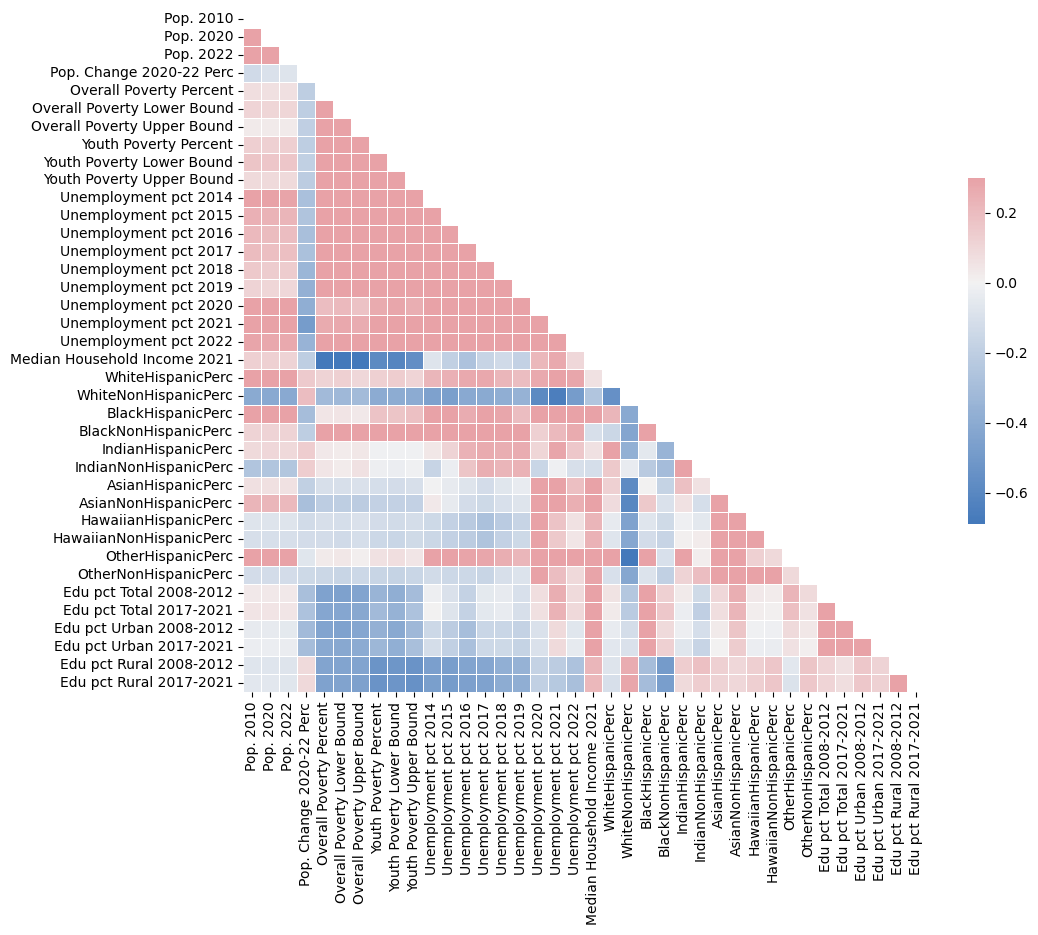

In [89]:
d = df.drop(labels=['state','Labels'], axis=1)

corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Clustering only for the socio-economic data

In [90]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df.drop(['state','Labels'], axis = 1)) 

# Normalizing the Data 
normalized_df = normalize(scaled_df) 

# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
normalized_df.columns = df.columns[2:]
normalized_df.rename_axis(None, axis = 1, inplace = True)
normalized_df

Pop. 2010  Pop. 2020  Pop. 2022  Pop. Change 2020-22 Perc  \
0   -0.034145  -0.036404  -0.035985                  0.029001   
1   -0.096396  -0.095810  -0.096204                 -0.052186   
2    0.009890   0.017578   0.022155                  0.261519   
3   -0.095719  -0.097995  -0.097845                  0.050301   
4    0.444498   0.433590   0.425548                 -0.118308   
..        ...        ...        ...                       ...   
46   0.069250   0.069857   0.070241                 -0.018409   
47   0.025171   0.041700   0.043148                  0.048534   
48  -0.087668  -0.090453  -0.091313                 -0.151814   
49  -0.017265  -0.026240  -0.027796                 -0.145455   
50  -0.182616  -0.181455  -0.182039                  0.007771   

    Overall Poverty Percent  Overall Poverty Lower Bound  \
0                  0.257821                     0.257776   
1                 -0.082396                    -0.089803   
2                  0.024851                     0.029744   
3                  0.269860                     0.269562   
4                 -0.009944                    -0.000364   
..                      ...                          ...   
46                -0.208310                    -0.195582   
47                -0.258543                    -0.245517   
48                 0.227691                     0.222498   
49                -0.214957                    -0.197480   
50                -0.169086                    -0.200263   

    Overall Poverty Upper Bound  Youth Poverty Percent  \
0                      0.257014               0.267179   
1                     -0.074892              -0.078447   
2                      0.019992               0.068540   
3                      0.269260               0.261391   
4                     -0.019265              -0.010956   
..                          ...                    ...   
46                    -0.220049              -0.165724   
47                    -0.270408              -0.250810   
48                     0.232010               0.165837   
49                    -0.231311              -0.197331   
50                    -0.138089              -0.217119   

    Youth Poverty Lower Bound  Youth Poverty Upper Bound  \
0                    0.270862                   0.262107   
1                   -0.081955                  -0.074652   
2                    0.076703                   0.060381   
3                    0.264593                   0.256811   
4                   -0.001201                  -0.020159   
..                        ...                        ...   
46                  -0.155907                  -0.174075   
47                  -0.248187                  -0.251826   
48                   0.164403                   0.166223   
49                  -0.183831                  -0.208996   
50                  -0.235861                  -0.198034   

    Unemployment pct 2014  Unemployment pct 2015  Unemployment pct 2016  \
0                0.133937               0.180632               0.225618   
1                0.090159               0.143938               0.236990   
2                0.161436               0.197117               0.167360   
3                0.024993              -0.002223              -0.133849   
4                0.138174               0.113674               0.081530   
..                    ...                    ...                    ...   
46              -0.119467              -0.134757              -0.156051   
47               0.030748               0.090243               0.138880   
48               0.082501               0.205293               0.203830   
49              -0.108930              -0.178325              -0.238226   
50              -0.250722              -0.167238               0.167931   

    Unemployment pct 2017  Unemployment pct 2018  Unemployment pct 2019  \
0                0.067277               0.029347              -0.084504   
1                0.310765        

# KMeans for Socioeconomic Data

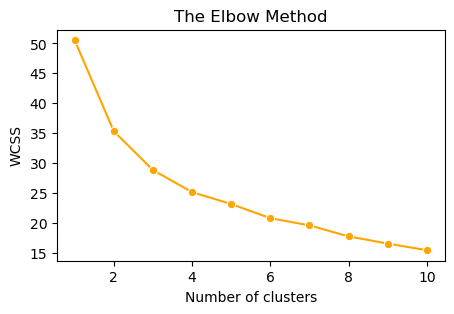

In [91]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(normalized_df)
    # inertia method returns wcss for that model
    wcss.append([i,kmeans.inertia_])

    
wcss_x = [i[0] for i in wcss]
wcss_y = [i[1] for i in wcss]

plt.figure(figsize=(5,3))
sns.lineplot(x=wcss_x, y=wcss_y, marker='o',color='orange')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

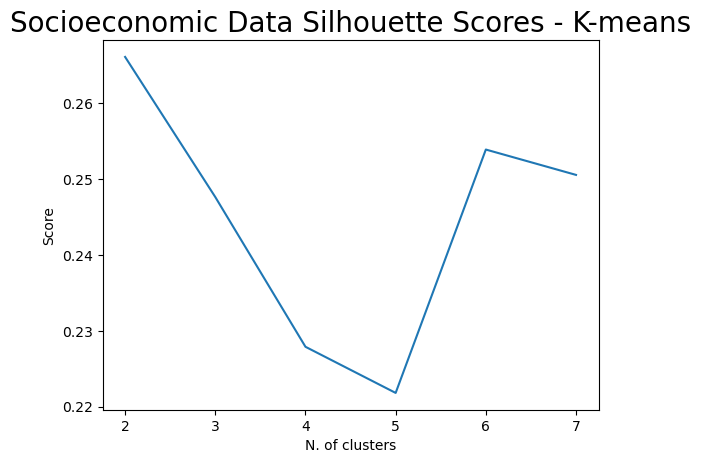

In [92]:
n_clusters=np.arange(2, 8)
sils=[]
sils_err=[]
iterations=5
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,n_clusters=n, n_init=10,random_state=60, tol=0.0001, verbose=0).fit(normalized_df)
        labels=kmeans.predict(normalized_df)
        sil=metrics.silhouette_score(normalized_df, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean((np.array(tmp_sil)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

# Plotting the results
plt.plot(n_clusters, sils)
plt.title("Socioeconomic Data Silhouette Scores - K-means", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.savefig('SocEcoKmeansSilScore')

In [93]:
kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
 n_clusters=3, n_init=10,
 random_state=60, tol=0.0001, verbose=0)


labels = kmeans.fit_predict(normalized_df)
df_soc_kmeans = df.drop(columns=['state','Labels'])
df_soc_kmeans['Socio Labels'] = labels

print("No. of clusters: ", 3)
df_soc_kmeans_clust = df_soc_kmeans.groupby(by = 'Socio Labels').mean().astype(float).round(2)
df_soc_kmeans_clust

No. of clusters:  3


Pop. 2010   Pop. 2020   Pop. 2022  Pop. Change 2020-22 Perc  \
Socio Labels                                                                 
0             3047862.50  3269783.00  3299480.72                      1.28   
1             8856461.45  9581110.95  9610170.70                      0.25   
2             5904214.15  6228554.38  6284114.62                      0.72   

              Overall Poverty Percent  Overall Poverty Lower Bound  \
Socio Labels                                                         
0                               10.66                        10.26   
1                               12.38                        12.04   
2                               15.52                        15.18   

              Overall Poverty Upper Bound  Youth Poverty Percent  \
Socio Labels                                                       
0                                   11.06                  12.66   
1                                   12.72                  16.44   
2                                   15.85                  21.09   

              Youth Poverty Lower Bound  Youth Poverty Upper Bound  \
Socio Labels                                                         
0                                 11.94                      13.38   
1                                 15.66                      17.23   
2                                 20.39                      21.79   

              Unemployment pct 2014  Unemployment pct 2015  \
Socio Labels                                                 
0                              4.48                   3.89   
1                              6.48                   5.59   
2                              6.37                   5.67   

              Unemployment pct 2016  Unemployment pct 2017  \
Socio Labels                                                 
0                              3.73                   3.31   
1                              5.12                   4.66   
2                              5.21                   4.56   

              Unemployment pct 2018  Unemployment pct 2019  \
Socio Labels                                                 
0                              3.03                   2.93   
1                              4.20                   3.95   
2                              4.12                   3.92   

              Unemployment pct 2020  Unemployment pct 2021  \
Socio Labels                                                 
0                              5.74                   3.68   
1                              8.85                   6.00   
2                              7.35                   4.63   

              Unemployment pct 2022  Median Household Income 2021  \
Socio Labels                                                        
0                              2.68                      70270.00   
1                              4.04                      76392.90   
2                              3.52                      57183.85   

              WhiteHispanicPerc  WhiteNonHispanicPerc  BlackHispanicPerc  \
Socio Labels                                                               
0                          4.59                 80.68               0.12   
1                         10.94                 54.85               0.50   
2                          3.22                 68.95               0.19   

              BlackNonHispanicPerc  IndianHispanicPerc  IndianNonHispanicPerc  \
Socio Labels                                                                    
0                             4.53                0.16                   1.57   
1                            11.33                0.23                   1.59   
2                            19.25                0.09                   0.91   

              AsianHispanicPerc  AsianNonHispanicPerc  HawaiianHispanicPerc  \
Socio Labels                                                                  
0                          0.03               

In [94]:
df['Socio Labels'] = labels

df_soc_km = df.reset_index()

cluster_color_soc_km = {0: '#ffb371', 2: '#90ee60', 1: '#640064'}


df_soc_km['color'] = df_soc_km['Socio Labels'].map(cluster_color_soc_km)
color_code_soc_km = {key: val for key, val in zip(df_soc_km['state'], df_soc_km['color'])}

geo_json_data = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
).json()

# Create a map centered at the mean of all state coordinates
m_soc_km = folium.Map(location=[39.8283, -98.5795], zoom_start=4)


tooltip = folium.GeoJsonTooltip(
    fields=["name"],
    aliases=["State: "],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)


folium.GeoJson(
    geo_json_data,
    style_function=lambda x: {
        'fillColor': color_code_soc_km.get(x['properties']['name']) ,
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.5,
    },
    tooltip=tooltip
).add_to(m_soc_km)
m_soc_km.save('KMeans Socioeconomic US Cluster Map 3.html')
print("Green: Lowest Poverty \nOrange: Medium Poverty\nPurple: Highest Poverty")
m_soc_km

Green: Lowest Poverty 
Orange: Medium Poverty
Purple: Highest Poverty


In [95]:
m_kmeans

### Agglomerative clustering on socioeconomic data

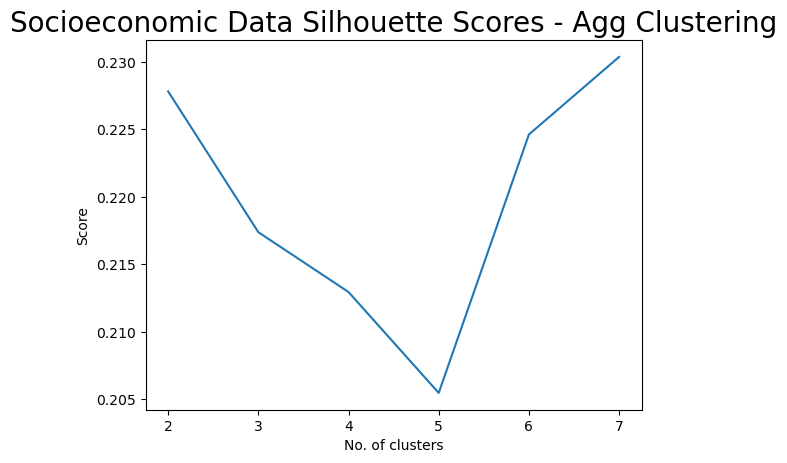

In [96]:
n_clusters=np.arange(2, 8)
sils=[]
iterations=5
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        agg=AgglomerativeClustering(n).fit(normalized_df) 
        labels=agg.fit_predict(normalized_df)
        sil=metrics.silhouette_score(normalized_df, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean((np.array(tmp_sil)))
    sils.append(val)

# Plotting the results
plt.plot(n_clusters, sils)
plt.title("Socioeconomic Data Silhouette Scores - Agg Clustering", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("No. of clusters")
plt.ylabel("Score")
plt.savefig('SocioEcoAggClustSilScore')

In [97]:
clustering = AgglomerativeClustering(3)
cluster_labels = clustering.fit_predict(normalized_df)

df_soc_agg = df.drop(columns=['state','Labels','Socio Labels'])
df_soc_agg['Socio Labels'] = cluster_labels
print("No. of clusters: ", 3)
df_soc_agg_clusters = df_soc_agg.groupby(by = 'Socio Labels').mean().astype(float).round(2)
df_soc_agg_clusters

No. of clusters:  3


Pop. 2010   Pop. 2020   Pop. 2022  Pop. Change 2020-22 Perc  \
Socio Labels                                                                 
0             9030941.32  9731266.12  9771562.12                      0.36   
1             2292518.13  2485608.13  2513069.33                      1.42   
2             4416748.45  4625795.00  4663860.36                      0.63   

              Overall Poverty Percent  Overall Poverty Lower Bound  \
Socio Labels                                                         
0                               12.48                        12.16   
1                               10.44                        10.01   
2                               15.69                        15.33   

              Overall Poverty Upper Bound  Youth Poverty Percent  \
Socio Labels                                                       
0                                   12.80                  16.67   
1                                   10.87                  12.16   
2                                   16.05                  21.08   

              Youth Poverty Lower Bound  Youth Poverty Upper Bound  \
Socio Labels                                                         
0                                 15.93                      17.40   
1                                 11.41                      12.91   
2                                 20.35                      21.82   

              Unemployment pct 2014  Unemployment pct 2015  \
Socio Labels                                                 
0                              6.43                   5.54   
1                              4.23                   3.72   
2                              6.25                   5.58   

              Unemployment pct 2016  Unemployment pct 2017  \
Socio Labels                                                 
0                              5.08                   4.63   
1                              3.61                   3.25   
2                              5.10                   4.33   

              Unemployment pct 2018  Unemployment pct 2019  \
Socio Labels                                                 
0                              4.15                   3.90   
1                              3.00                   2.90   
2                              3.95                   3.78   

              Unemployment pct 2020  Unemployment pct 2021  \
Socio Labels                                                 
0                              8.62                   5.74   
1                              5.57                   3.63   
2                              7.01                   4.41   

              Unemployment pct 2022  Median Household Income 2021  \
Socio Labels                                                        
0                              3.94                      74520.72   
1                              2.65                      70626.40   
2                              3.31                      55790.36   

              WhiteHispanicPerc  WhiteNonHispanicPerc  BlackHispanicPerc  \
Socio Labels                                                               
0                          9.57                 57.03               0.46   
1                          4.75                 82.25               0.11   
2                          2.98                 71.46               0.14   

              BlackNonHispanicPerc  IndianHispanicPerc  IndianNonHispanicPerc  \
Socio Labels                                                                    
0                            12.92                0.20                   1.35   
1                             2.82                0.18                   1.84   
2                            17.54                0.08                   0.96   

              AsianHispanicPerc  AsianNonHispanicPerc  HawaiianHispanicPerc  \
Socio Labels                                                                  
0                          0.11               

In [98]:
df['Socio Labels'] = cluster_labels

df_soc_agg = df.reset_index()

cluster_color_soc_agg = {2: '#90ee60', 1: '#ffb371', 0: '#640064'}


df_soc_agg['color'] = df_soc_agg['Socio Labels'].map(cluster_color_soc_agg)
color_code_soc_agg = {key: val for key, val in zip(df_soc_agg['state'], df_soc_agg['color'])}

geo_json_data = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
).json()

# Create a map centered at the mean of all state coordinates
m_soc_agg = folium.Map(location=[39.8283, -98.5795], zoom_start=4)


tooltip = folium.GeoJsonTooltip(
    fields=["name"],
    aliases=["State: "],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)


folium.GeoJson(
    geo_json_data,
    style_function=lambda x: {
        'fillColor': color_code_soc_agg.get(x['properties']['name']) ,
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.5,
    },
    tooltip=tooltip
).add_to(m_soc_agg)
m_soc_agg.save('Agg Socioeconomic US Cluster Map 3.html')
print("Green: Lowest Poverty\nOrange: Medium Poverty\nPurple: Highest Poverty")
m_soc_agg

Green: Lowest Poverty
Orange: Medium Poverty
Purple: Highest Poverty


In [99]:
m_agg

### Gausian Mixture Model on socioeconomic

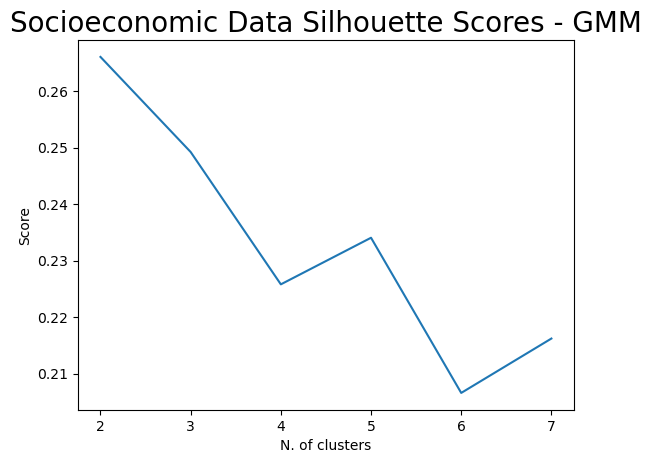

In [100]:
n_clusters=np.arange(2, 8)
sils=[]
sils_err=[]
iterations=5
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2, random_state = 0).fit(normalized_df) 
        labels=gmm.predict(normalized_df)
        sil=metrics.silhouette_score(normalized_df, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean((np.array(tmp_sil)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

# Plotting the results
plt.plot(n_clusters, sils)
plt.title("Socioeconomic Data Silhouette Scores - GMM", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.savefig('GMMSilScore')

In [101]:
param_grid = {
    'n_components': [3,4],  # Try different numbers of components
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],  # Try different covariance types
    'init_params': ['kmeans', 'random', 'kmeans++']  # Try different initialization methods
}

# Initialize GMM model
gmm = GaussianMixture(random_state=0)

# Perform grid search
grid_search = GridSearchCV(gmm, param_grid, cv=5)  # Use cross-validation
grid_search.fit(normalized_df)  

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'covariance_type': 'spherical', 'init_params': 'random', 'n_components': 3}


In [102]:
clustering = GaussianMixture(3, n_init=2, covariance_type = 'full', init_params = 'kmeans', random_state = 0, max_iter = 200)
cluster_labels = clustering.fit_predict(normalized_df)


df_soc_gmm = df.drop(columns=['state','Labels','Socio Labels'])
df_soc_gmm['Socio Labels'] = cluster_labels
print("No. of clusters: ", 3)
df_soc_gmm_clusters = df_soc_gmm.groupby(by = 'Socio Labels').mean().astype(float).round(2)
df_soc_gmm_clusters

No. of clusters:  3


Pop. 2010   Pop. 2020   Pop. 2022  Pop. Change 2020-22 Perc  \
Socio Labels                                                                 
0             2649299.75  2869719.12  2898728.69                      1.37   
1             5948500.87  6260786.33  6313632.27                      0.70   
2             8856461.45  9581110.95  9610170.70                      0.25   

              Overall Poverty Percent  Overall Poverty Lower Bound  \
Socio Labels                                                         
0                               10.43                        10.02   
1                               15.11                        14.77   
2                               12.38                        12.04   

              Overall Poverty Upper Bound  Youth Poverty Percent  \
Socio Labels                                                       
0                                   10.84                  12.23   
1                                   15.44                  20.43   
2                                   12.72                  16.44   

              Youth Poverty Lower Bound  Youth Poverty Upper Bound  \
Socio Labels                                                         
0                                 11.49                      12.97   
1                                 19.74                      21.11   
2                                 15.66                      17.23   

              Unemployment pct 2014  Unemployment pct 2015  \
Socio Labels                                                 
0                              4.28                   3.76   
1                              6.33                   5.57   
2                              6.48                   5.59   

              Unemployment pct 2016  Unemployment pct 2017  \
Socio Labels                                                 
0                              3.64                   3.28   
1                              5.11                   4.43   
2                              5.12                   4.66   

              Unemployment pct 2018  Unemployment pct 2019  \
Socio Labels                                                 
0                              3.00                   2.89   
1                              4.01                   3.83   
2                              4.20                   3.95   

              Unemployment pct 2020  Unemployment pct 2021  \
Socio Labels                                                 
0                              5.62                   3.64   
1                              7.27                   4.55   
2                              8.85                   6.00   

              Unemployment pct 2022  Median Household Income 2021  \
Socio Labels                                                        
0                              2.67                      71270.12   
1                              3.42                      57861.87   
2                              4.04                      76392.90   

              WhiteHispanicPerc  WhiteNonHispanicPerc  BlackHispanicPerc  \
Socio Labels                                                               
0                          4.77                 80.94               0.12   
1                          3.21                 70.24               0.18   
2                         10.94                 54.85               0.50   

              BlackNonHispanicPerc  IndianHispanicPerc  IndianNonHispanicPerc  \
Socio Labels                                                                    
0                             3.81                0.17                   1.74   
1                            18.05                0.09                   0.82   
2                            11.33                0.23                   1.59   

              AsianHispanicPerc  AsianNonHispanicPerc  HawaiianHispanicPerc  \
Socio Labels                                                                  
0                          0.03               

In [103]:
df['Socio Labels'] = cluster_labels

df_soc_gmm = df.reset_index()

cluster_color_soc_gmm = {1: '#90ee60', 0: '#ffb371', 2: '#640064'}


df_soc_gmm['color'] = df_soc_gmm['Socio Labels'].map(cluster_color_soc_gmm)
color_code_soc_gmm = {key: val for key, val in zip(df_soc_gmm['state'], df_soc_gmm['color'])}

geo_json_data = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
).json()

# Create a map centered at the mean of all state coordinates
m_soc_gmm = folium.Map(location=[39.8283, -98.5795], zoom_start=4)


tooltip = folium.GeoJsonTooltip(
    fields=["name"],
    aliases=["State: "],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)


folium.GeoJson(
    geo_json_data,
    style_function=lambda x: {
        'fillColor': color_code_soc_gmm.get(x['properties']['name']) ,
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.5,
    },
    tooltip=tooltip
).add_to(m_soc_gmm)
m_soc_gmm.save('GMM Socioeconomic US Cluster Map 2.html')
print("White: Lowest Education\nLight Green: Medium Education\nDark Green: Highest Education")
m_soc_gmm

White: Lowest Education
Light Green: Medium Education
Dark Green: Highest Education


In [104]:
m_soc_km

In [105]:
m_soc_agg

In [106]:
m_gmm

# Key Features affecting clusters
- Cluster 0 has the lowest population, poverty, unemp, black population.  Highest White Pop and Rural Education.
- Cluster Label 1 has high influence from poverty features, with the highest poverty rates in the cluster. It also has the lowest median household income and lowest total education rate. It has the highest Black ppopulation.
- Cluster 2 has the highest population, Unemployment pct, median household income, Asian , Other(POC+Mixed) population, Total education pct (not Rural). Lowest White population.

In [107]:
df

state  Labels Pop. 2010 Pop. 2020 Pop. 2022  \
0         Alabama       2   4779736   5024356   5074296   
1          Alaska       2    710231    733378    733583   
2         Arizona       0   6392017   7151507   7359197   
3        Arkansas       2   2915918   3011555   3045637   
4      California       1  37253956  39538245  39029342   
..            ...     ...       ...       ...       ...   
46       Virginia       0   8001024   8631384   8683619   
47     Washington       1   6724540   7705247   7785786   
48  West Virginia       2   1852994   1793755   1775156   
49      Wisconsin       0   5686986   5893725   5892539   
50        Wyoming       2    563626    576837    581381   

   Pop. Change 2020-22 Perc Overall Poverty Percent  \
0                  0.993958                    16.3   
1                  0.027953                    10.8   
2                  2.904143                    12.9   
3                  1.131708                      16   
4                 -1.287116                    12.3   
..                      ...                     ...   
46                 0.605175                    10.3   
47                 1.045249                     9.9   
48                -1.036875                    16.8   
49                -0.020123                    10.8   
50                 0.787744                    10.6   

   Overall Poverty Lower Bound Overall Poverty Upper Bound  \
0                         15.9                        16.7   
1                         10.3                        11.3   
2                         12.6                        13.2   
3                         15.6                        16.4   
4                         12.2                        12.4   
..                         ...                         ...   
46                        10.1                        10.5   
47                         9.7                        10.1   
48                        16.3                        17.3   
49                        10.6                          11   
50                         9.9                        11.3   

   Youth Poverty Percent Youth Poverty Lower Bound Youth Poverty Upper Bound  \
0                   22.7                      21.9                      23.5   
1                   13.5                      12.7                      14.3   
2                   17.8                      17.2                      18.4   
3                   21.8                        21                      22.6   
4                   15.8                      15.5                      16.1   
..                   ...                       ...                       ...   
46                  13.3                      12.8                      13.8   
47                    12                      11.4                      12.6   
48                  21.4                      20.5                      22.3   
49                  13.6                      13.1                      14.1   
50                  12.1                      11.1                      13.1   

    Unemployment pct 2014  Unemployment pct 2015  Unemployment pct 2016  \
0                     6.7                    6.1                    5.9   
1                     6.7                    6.3                    6.6   
2                     6.8                    6.1                    5.5   
3                     5.9                    5.0                    4.0   
4                     7.6                    6.3                    5.5   
..                    ...                    ...                    ...   
46                    5.1                    4.4                    4.0   
47                    5.9                    5.4                    5.2   
48                    6.5                    6.6                    6.1   
49                    5.3                    4.4                    3.9   
50                    4.3                    4.2                    5.4   

    Unemployment pct 2017  Unemploy

In [108]:
df_swing_final = df[df.Labels==0]
df_swing_final

state  Labels Pop. 2010 Pop. 2020 Pop. 2022  \
2          Arizona       0   6392017   7151507   7359197   
9          Florida       0  18801310  21538226  22244823   
10         Georgia       0   9687653  10711937  10912876   
22        Michigan       0   9883640  10077325  10034113   
23       Minnesota       0   5303925   5706504   5717184   
28          Nevada       0   2700551   3104624   3177772   
31      New Mexico       0   2059179   2117527   2113344   
33  North Carolina       0   9535483  10439414  10698973   
35            Ohio       0  11536504  11799374  11756058   
38    Pennsylvania       0  12702379  13002689  12972008   
43           Texas       0  25145561  29145428  30029572   
46        Virginia       0   8001024   8631384   8683619   
49       Wisconsin       0   5686986   5893725   5892539   

   Pop. Change 2020-22 Perc Overall Poverty Percent  \
2                  2.904143                    12.9   
9                  3.280665                    13.2   
10                 1.875842                    14.2   
22                -0.428804                      13   
23                 0.187155                     9.3   
28                 2.356099                      14   
31                -0.197542                    17.7   
33                 2.486337                    13.5   
35                -0.367104                    13.3   
38                -0.235959                      12   
43                  3.03356                    14.2   
46                 0.605175                    10.3   
49                -0.020123                    10.8   

   Overall Poverty Lower Bound Overall Poverty Upper Bound  \
2                         12.6                        13.2   
9                           13                        13.4   
10                        13.9                        14.5   
22                        12.8                        13.2   
23                         9.1                         9.5   
28                        13.6                        14.4   
31                        17.1                        18.3   
33                        13.2                        13.8   
35                        13.1                        13.5   
38                        11.8                        12.2   
43                          14                        14.4   
46                        10.1                        10.5   
49                        10.6                          11   

   Youth Poverty Percent Youth Poverty Lower Bound Youth Poverty Upper Bound  \
2                   17.8                      17.2                      18.4   
9                   18.4                      17.8                        19   
10                  20.5                      19.9                      21.1   
22                  17.6                      17.1                      18.1   
23                  10.8                      10.3                      11.3   
28                  18.8                        18                      19.6   
31                  23.1                      22.1                      24.1   
33                  18.2                      17.6                      18.8   
35                  18.2                      17.7                      18.7   
38                  16.3                      15.7                      16.9   
43                  19.5                        19                        20   
46                  13.3                      12.8                      13.8   
49                  13.6                      13.1                      14.1   

    Unemployment pct 2014  Unemployment pct 2015  Unemployment pct 2016  \
2                     6.8                    6.1                    5.5   
9                     6.4                    5.5                    4.9   
10                    7.1                    6.1                    5.4   
22                    7.2                    5.4                    5.0   
23                    4.3           

In [109]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df_swing_final.drop(['state','Labels','Socio Labels'], axis = 1)) 

# Normalizing the Data 
normalized_df = normalize(scaled_df) 

# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
normalized_df.columns = df_swing_final.columns[2:-1]
normalized_df.rename_axis(None, axis = 1, inplace = True)
normalized_df

Pop. 2010  Pop. 2020  Pop. 2022  Pop. Change 2020-22 Perc  \
0   -0.124263  -0.111885  -0.107204                  0.270913   
1    0.281332   0.291410   0.295666                  0.283569   
2   -0.004301  -0.000160   0.000659                  0.111072   
3    0.003547  -0.024167  -0.031338                 -0.308340   
4   -0.086719  -0.083187  -0.083084                 -0.083953   
5   -0.122819  -0.113386  -0.111117                  0.087460   
6   -0.129522  -0.123892  -0.122307                 -0.100775   
7   -0.017043  -0.015239  -0.010236                  0.358510   
8    0.076191   0.040975   0.031641                 -0.297113   
9    0.136318   0.092561   0.081467                 -0.291085   
10   0.418141   0.432599   0.434460                  0.217962   
11  -0.038821  -0.038704  -0.039629                 -0.054753   
12  -0.114417  -0.115491  -0.115764                 -0.146085   

    Overall Poverty Percent  Overall Poverty Lower Bound  \
0                 -0.005958                    -0.009776   
1                  0.023375                     0.031269   
2                  0.141392                     0.143983   
3                  0.006150                     0.016053   
4                 -0.213919                    -0.219121   
5                  0.054948                     0.050200   
6                  0.241119                     0.234208   
7                  0.105768                     0.104211   
8                  0.046204                     0.057890   
9                 -0.136202                    -0.131887   
10                 0.103153                     0.113685   
11                -0.173672                    -0.176601   
12                -0.181862                    -0.183779   

    Overall Poverty Upper Bound  Youth Poverty Percent  \
0                     -0.002447               0.029189   
1                      0.016099               0.061912   
2                      0.138837               0.228141   
3                     -0.002947               0.017905   
4                     -0.208875              -0.249717   
5                      0.059237               0.047839   
6                      0.247159               0.187613   
7                      0.107064               0.101204   
8                      0.035421               0.069754   
9                     -0.139990              -0.100916   
10                     0.093356               0.112883   
11                    -0.170765              -0.173275   
12                    -0.179873              -0.207177   

    Youth Poverty Lower Bound  Youth Poverty Upper Bound  \
0                    0.030046                   0.028347   
1                    0.063730                   0.060125   
2                    0.234840                   0.221556   
3                    0.027305                   0.009016   
4                   -0.253150                  -0.246188   
5                    0.042247                   0.053058   
6                    0.179587                   0.194966   
7                    0.104175                   0.098283   
8                    0.080692                   0.059354   
9                   -0.103879                  -0.098003   
10                   0.121710                   0.104423   
11                  -0.174004                  -0.172385   
12                  -0.207637                  -0.206503   

    Unemployment pct 2014  Unemployment pct 2015  Unemployment pct 2016  \
0                0.143304               0.188481               0.143793   
1                0.046848               0.030327              -0.026992   
2                0.215159               0.193261               0.117490   
3                0.279377               0.011821              -0.002705   
4               -0.217528              -0.210869              -0.171174   
5                0.215397               0.174268               0.109843   
6                0.045427               0.145122               0.226929  

In [110]:
clustering = GaussianMixture(3, n_init=2, covariance_type = 'full', init_params = 'kmeans', random_state = 0, max_iter = 200)
cluster_labels = clustering.fit_predict(normalized_df)

df_swing_gmm = df_swing_final.drop(columns=['state','Labels','Socio Labels'])
df_swing_gmm['Socio Labels'] = cluster_labels
print("No. of clusters: ", 3)
df_swing_gmm_clusters = df_swing_gmm.groupby(by = 'Socio Labels').mean().astype(float).round(2)
df_swing_gmm_clusters

No. of clusters:  3


Pop. 2010    Pop. 2020    Pop. 2022  Pop. Change 2020-22 Perc  \
Socio Labels                                                                    
0             12674815.33  14229859.00  14618890.67                      2.55   
1              9074327.00  10379771.50  10669971.25                      2.02   
2              8852409.67   9185166.83   9175920.17                     -0.04   

              Overall Poverty Percent  Overall Poverty Lower Bound  \
Socio Labels                                                         
0                               13.63                        13.37   
1                               14.70                        14.32   
2                               11.45                        11.25   

              Overall Poverty Upper Bound  Youth Poverty Percent  \
Socio Labels                                                       
0                                   13.90                  19.03   
1                                   15.08                  19.80   
2                                   11.65                  14.97   

              Youth Poverty Lower Bound  Youth Poverty Upper Bound  \
Socio Labels                                                         
0                                 18.43                      19.63   
1                                 19.08                      20.52   
2                                 14.45                      15.48   

              Unemployment pct 2014  Unemployment pct 2015  \
Socio Labels                                                 
0                              6.53                   5.77   
1                              6.70                   6.00   
2                              5.60                   4.73   

              Unemployment pct 2016  Unemployment pct 2017  \
Socio Labels                                                 
0                              5.13                   4.53   
1                              5.65                   5.10   
2                              4.52                   4.18   

              Unemployment pct 2018  Unemployment pct 2019  \
Socio Labels                                                 
0                              3.87                   3.57   
1                              4.50                   4.35   
2                              3.68                   3.65   

              Unemployment pct 2020  Unemployment pct 2021  \
Socio Labels                                                 
0                              7.27                   4.47   
1                              9.22                   6.18   
2                              7.72                   4.73   

              Unemployment pct 2022  Median Household Income 2021  \
Socio Labels                                                        
0                              3.20                      63852.67   
1                              4.28                      64106.00   
2                              3.52                      70074.83   

              WhiteHispanicPerc  WhiteNonHispanicPerc  BlackHispanicPerc  \
Socio Labels                                                               
0                          9.45                 56.04               0.49   
1                         23.66                 45.10               0.31   
2                          3.40                 74.88               0.24   

              BlackNonHispanicPerc  IndianHispanicPerc  IndianNonHispanicPerc  \
Socio Labels                                                                    
0                            22.46                0.12                   0.46   
1                             6.70                0.48                   3.36   
2                            11.24                0.07                   0.41   

              AsianHispanicPerc  AsianNonHispanicPerc  HawaiianHispanicPerc  \
Socio Labels                                                                  
0                          0.04 

In [111]:

df_socp_gmm = df_swing_final.copy(deep=True)

cluster_color_socp_gmm = {1: '#FF0000', 0: '#FFCC00', 2: '#FF6400'}


df_socp_gmm['color'] = df_socp_gmm['Socio Labels'].map(cluster_color_socp_gmm)
color_code_socp_gmm = {key: val for key, val in zip(df_socp_gmm['state'], df_socp_gmm['color'])}

geo_json_data = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
).json()

# Create a map centered at the mean of all state coordinates
m_socp_gmm = folium.Map(location=[39.8283, -98.5795], zoom_start=4)


tooltip = folium.GeoJsonTooltip(
    fields=["name"],
    aliases=["State: "],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)


folium.GeoJson(
    geo_json_data,
    style_function=lambda x: {
        'fillColor': color_code_socp_gmm.get(x['properties']['name'],'white') ,
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.5,
    },
    tooltip=tooltip
).add_to(m_socp_gmm)
m_socp_gmm.save('GMM Swing States Socioeconomic Cluster Map.html')
print("Red: Highest Poverty & Unemployment, Lowest Education\nYellow: Highest POC+Mixed Population, lowest Median Income \nOrange: Declining Total Population & Second Highest Unemployment")
m_socp_gmm

Red: Highest Poverty & Unemployment, Lowest Education
Yellow: Highest POC+Mixed Population, lowest Median Income 
Orange: Declining Total Population & Second Highest Unemployment


In [112]:
m_gmm